# Preprocessing(2) & Analysis 

## Importing Necessary Libraries

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sb
from sklearn.model_selection import train_test_split

import re
import joblib
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Data

In [108]:
df = pd.read_csv('preprocessed_game_info.csv')

In [109]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # Handle the error if conversion to numeric fails
            print(f"Conversion failed for column: {column}")

Conversion failed for column: NAME
Conversion failed for column: STORE_GENRE
Conversion failed for column: DEVELOPERS
Conversion failed for column: TECHNOLOGIES


In [110]:
feature_colors = sns.color_palette('hls', n_colors=len(df.columns))
features = df.columns
feature_color_map = dict(zip(features, feature_colors))
feature_colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5547294117647059, 0.33999999999999997),
 (0.86, 0.7382588235294117, 0.33999999999999997),
 (0.7982117647058823, 0.86, 0.33999999999999997),
 (0.6146823529411763, 0.86, 0.33999999999999997),
 (0.4311529411764704, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.43237647058823525),
 (0.33999999999999997, 0.86, 0.6159058823529412),
 (0.33999999999999997, 0.86, 0.7994352941176471),
 (0.33999999999999997, 0.7370352941176468, 0.86),
 (0.33999999999999997, 0.553505882352941, 0.86),
 (0.33999999999999997, 0.369976470588235, 0.86),
 (0.49355294117647014, 0.33999999999999997, 0.86),
 (0.677082352941176, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8593882352941175),
 (0.86, 0.33999999999999997, 0.6758588235294114),
 (0.86, 0.33999999999999997, 0.4923294117647055)]

## Initial Data Exploration

In [111]:
df.head()

NAME  \
0  dragon's dogma: dark arisen   
1              forza horizon 5   
2                       thrive   
3        layers of fear (2016)   
4                     taskpals   

                                         STORE_GENRE  RATING_SCORE  \
0                     ['Action', 'Adventure', 'RPG']             8   
1  ['Action', 'Adventure', 'Racing', 'Simulation'...             8   
2  ['Casual', 'Indie', 'Simulation', 'Early Access']             8   
3                             ['Adventure', 'Indie']             8   
4                          ['Indie', 'Free to Play']             8   

   N_SUPPORTED_LANGUAGES                  DEVELOPERS  POSITIVE_REVIEWS  \
0                      7                      Capcom             39271   
1                     24            Playground Games            156683   
2                      1  Revolutionary Games Studio               872   
3                     12             Bloober Team SA             22766   
4                      1                    lazarche               834   

   NEGATIVE_REVIEWS           TECHNOLOGIES  PRICE  24_HOUR_PEAK  PUBLISH_YEAR  \
0              5015                  [' ']    NaN        1064.0          2016   
1             21075                  [' ']    NaN       16131.0          2021   
2                70       ['Engine.Godot']   4.99          21.0          2021   
3              2819       ['Engine.Unity']    NaN          31.0          2016   
4                66  ['SDK.SteamworksNET']    NaN         318.0          2023   

   TWITCH_PEAK_HOUR  TWITCH_PEAK_YEAR  TOTAL_REVIEW  Linux  Windows  macOS  
0           27368.0              2016      0.886759      0        1      0  
1           81096.0              2021      0.881440      0        1      0  
2             145.0              2022      0.925690      1        1      0  
3          145384.0              2018      0.889818      1        1      1  
4            3778.0              2023      0.926667      0        1      0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2035 non-null   object 
 1   STORE_GENRE            2035 non-null   object 
 2   RATING_SCORE           2035 non-null   int64  
 3   N_SUPPORTED_LANGUAGES  2035 non-null   int64  
 4   DEVELOPERS             2035 non-null   object 
 5   POSITIVE_REVIEWS       2035 non-null   int64  
 6   NEGATIVE_REVIEWS       2035 non-null   int64  
 7   TECHNOLOGIES           2035 non-null   object 
 8   PRICE                  1258 non-null   float64
 9   24_HOUR_PEAK           2035 non-null   float64
 10  PUBLISH_YEAR           2035 non-null   int64  
 11  TWITCH_PEAK_HOUR       2035 non-null   float64
 12  TWITCH_PEAK_YEAR       2035 non-null   int64  
 13  TOTAL_REVIEW           2035 non-null   float64
 14  Linux                  2035 non-null   int64  
 15  Wind

## Plot the Count of Unique Values for Each Feature 

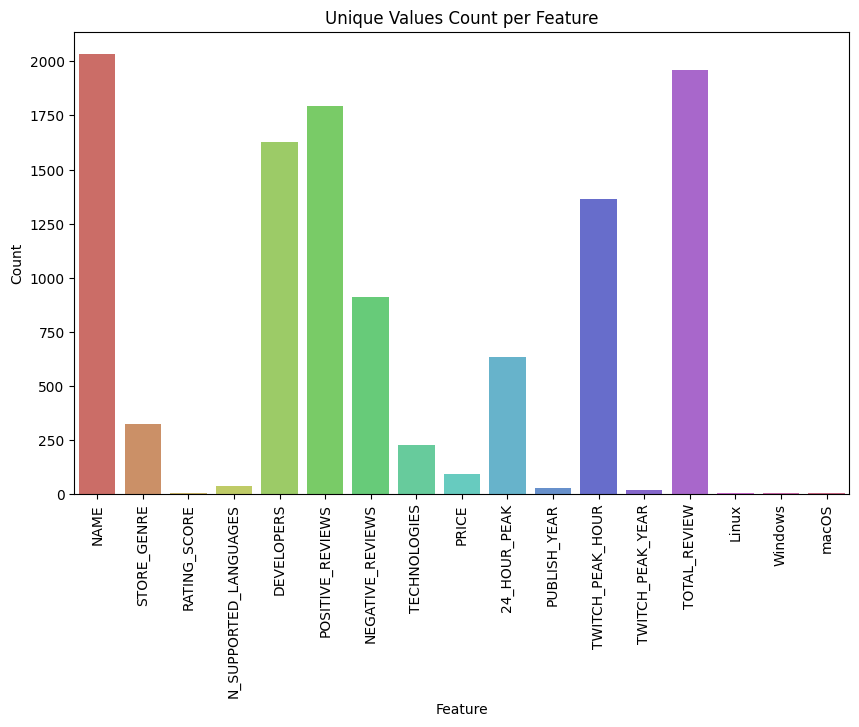

In [113]:
unique_counts = df.nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette=feature_colors)
plt.xticks(rotation=90)
plt.title('Unique Values Count per Feature')
plt.ylabel('Count')
plt.xlabel('Feature')
plt.show()

## Excluding Specific Columns from Numerical Column Selection

In [114]:
exclude_columns=['Windows', 'macOS', 'Linux']
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
numerical_df = df[numerical_columns]

## Outlier Detection and Handling

In [115]:
def plot_boxplots(df, exclude_columns=[]):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    num_columns = len(numerical_columns)
    
    num_rows = (num_columns + 2) // 3
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5 * num_rows))
    axes = axes.flatten() 
    
    for i, column in enumerate(numerical_columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

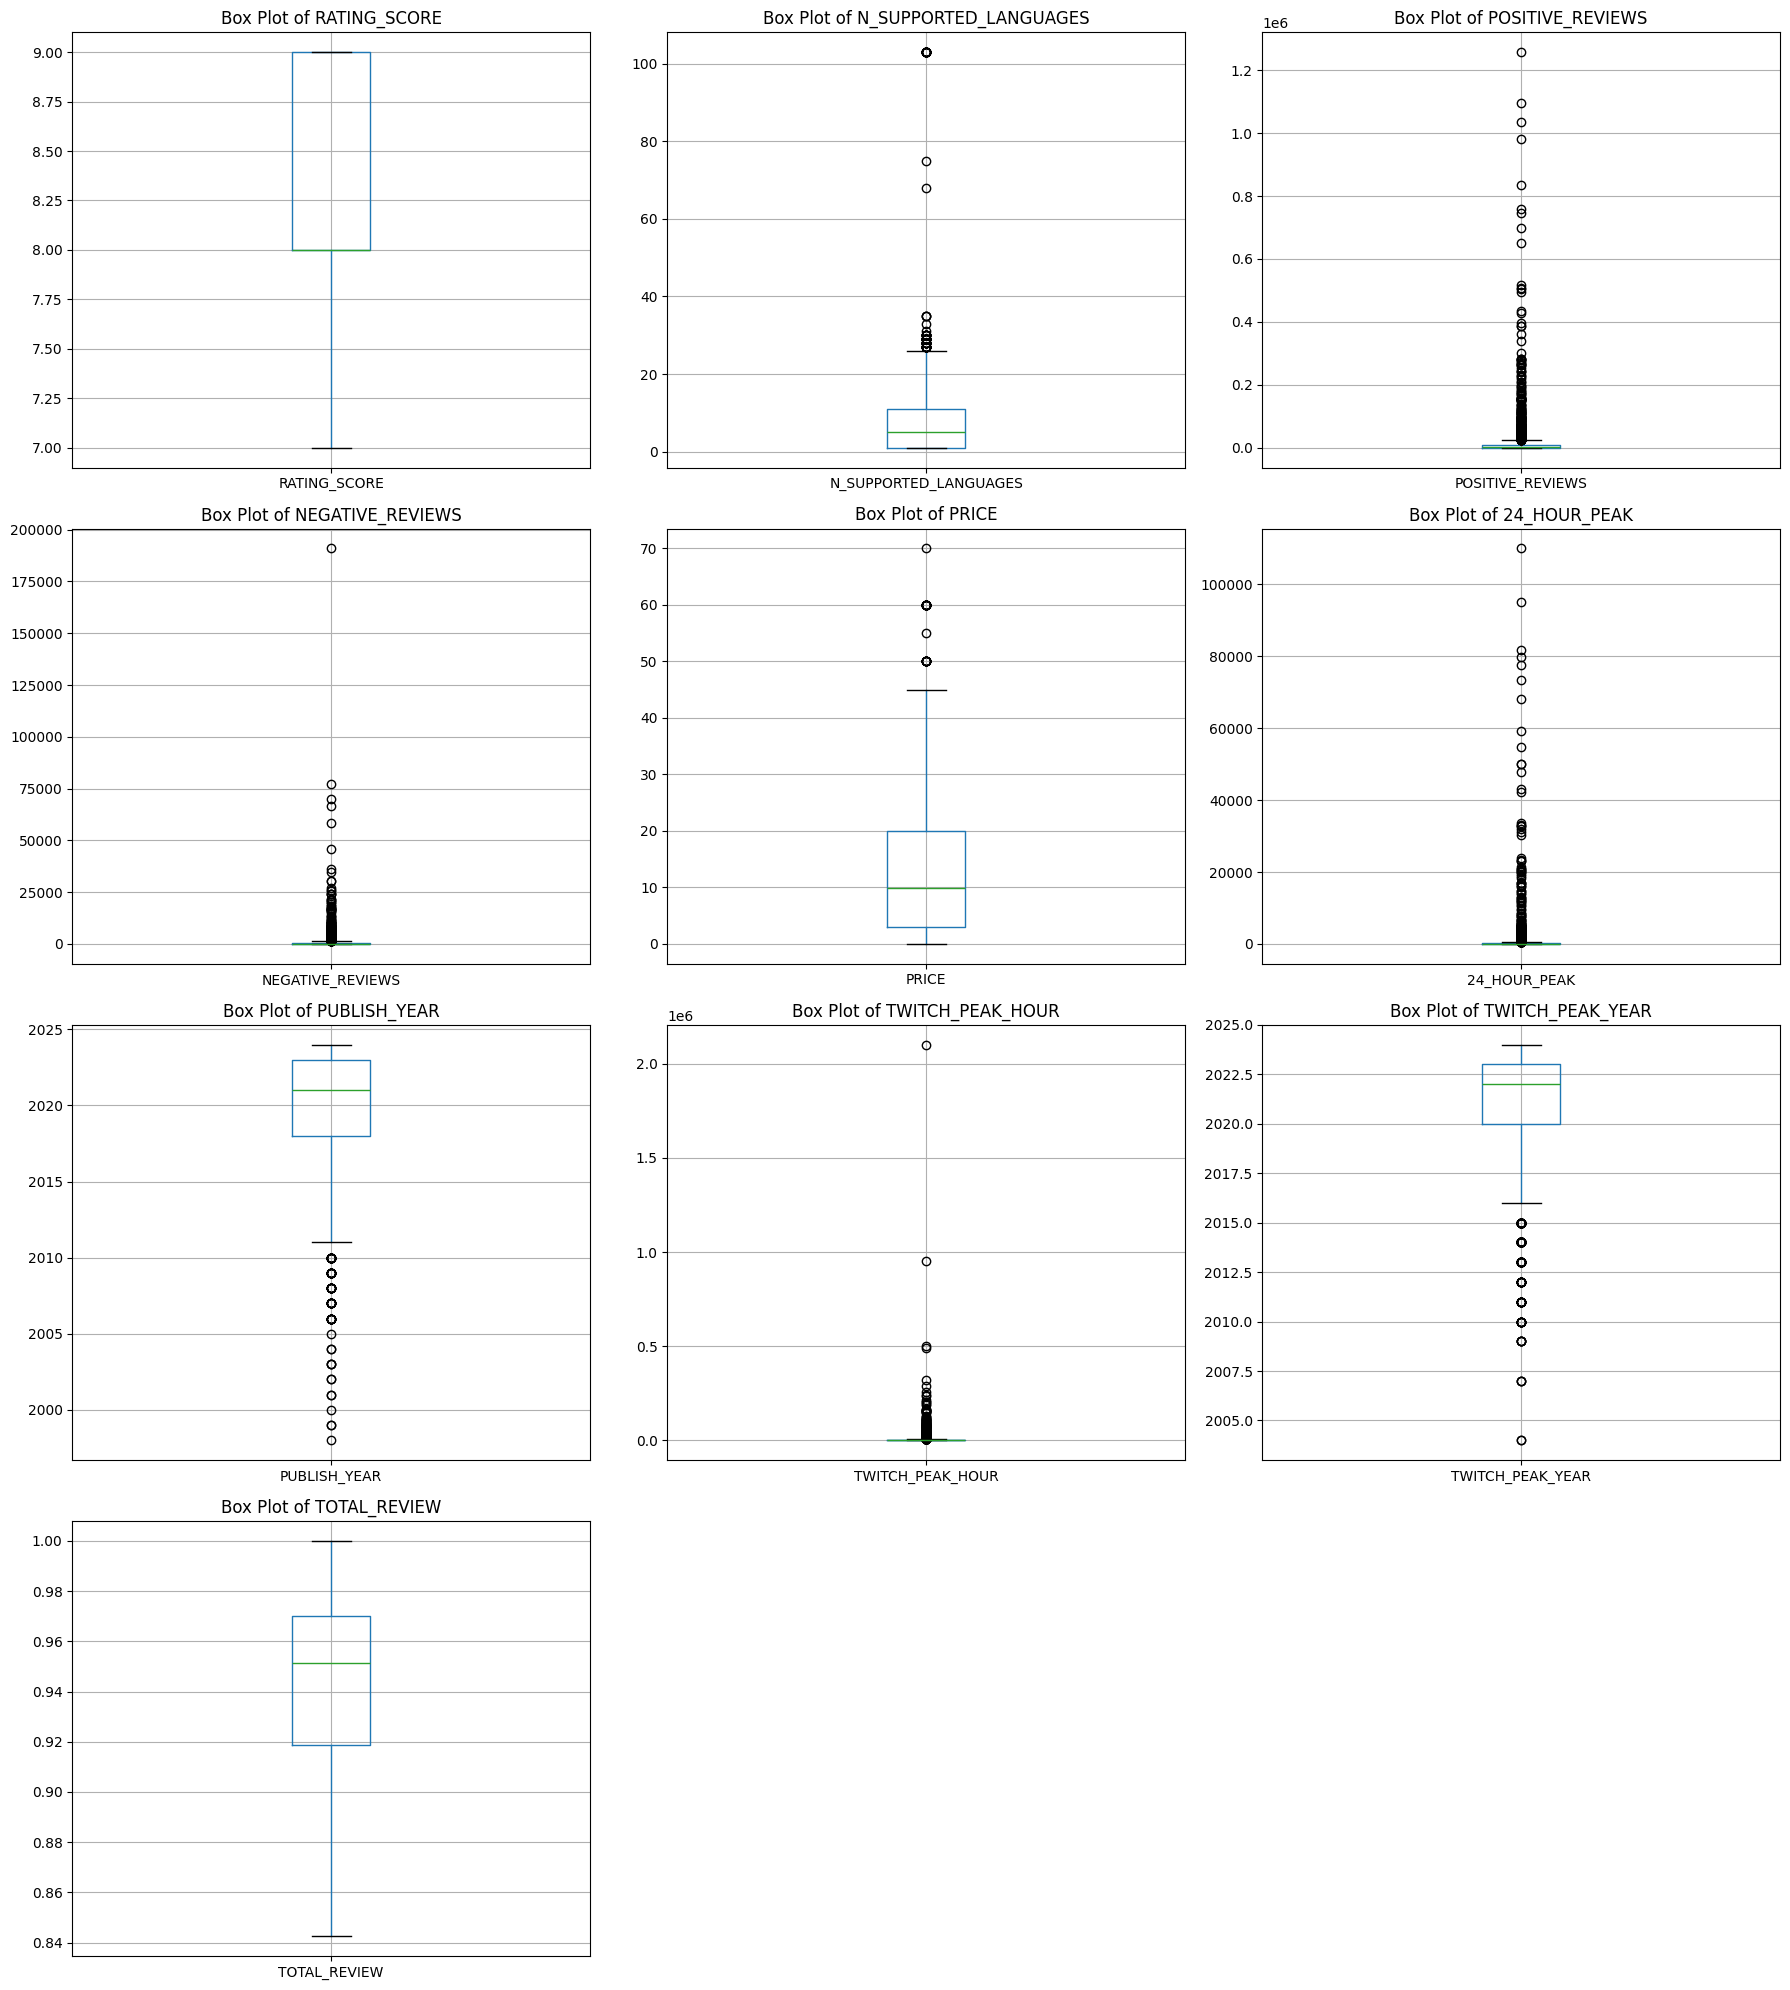

In [116]:
plot_boxplots(df, exclude_columns=['Windows', 'macOS', 'Linux'])


In [117]:
def suggest_outlier_handling_method(df, exclude_columns=[]):
    methods = {}
    
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]
    
    for column in numerical_columns:
        # Plot histogram and box plot
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(df[column], bins=30, kde=True, ax=ax[0])
        ax[0].set_title(f'Histogram of {column}')
        sns.boxplot(x=df[column], ax=ax[1])
        ax[1].set_title(f'Box Plot of {column}')
        plt.show()
        
        # Calculate basic statistics
        mean = df[column].mean()
        median = df[column].median()
        std = df[column].std()
        
        print(f'{column} Statistics:')
        print(f'Mean: {mean}, Median: {median}, Standard Deviation: {std}')
        
        # Determine outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        print(f'Number of Outliers: {len(outliers)}')
        
        if len(outliers) / len(df) < 0.05:
            if abs(mean - median) / std > 0.5:
                methods[column] = 'transform'
            else:
                methods[column] = 'remove'
        else:
            methods[column] = 'cap'
        
        print(f'Suggested Method for {column}: {methods[column]}')
        print('-' * 40)
    
    return methods

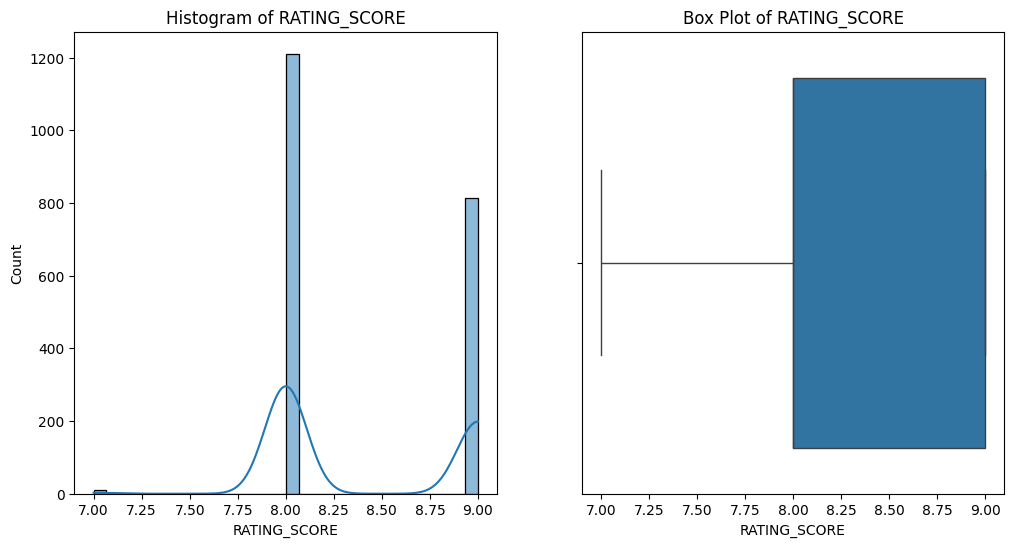

RATING_SCORE Statistics:
Mean: 8.394103194103193, Median: 8.0, Standard Deviation: 0.4997193107559466
Number of Outliers: 0
Suggested Method for RATING_SCORE: transform
----------------------------------------


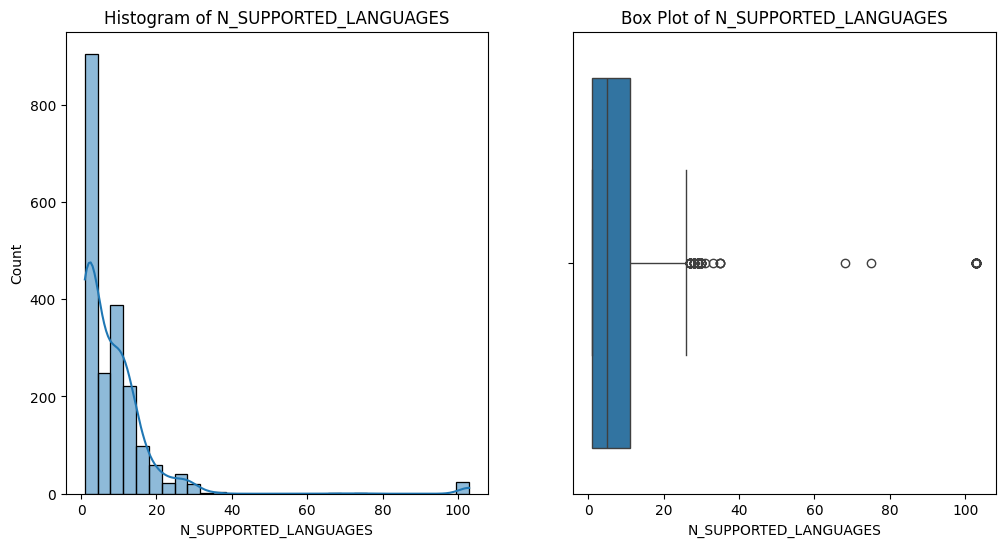

N_SUPPORTED_LANGUAGES Statistics:
Mean: 8.499754299754299, Median: 5.0, Standard Deviation: 12.426791518015705
Number of Outliers: 74
Suggested Method for N_SUPPORTED_LANGUAGES: remove
----------------------------------------


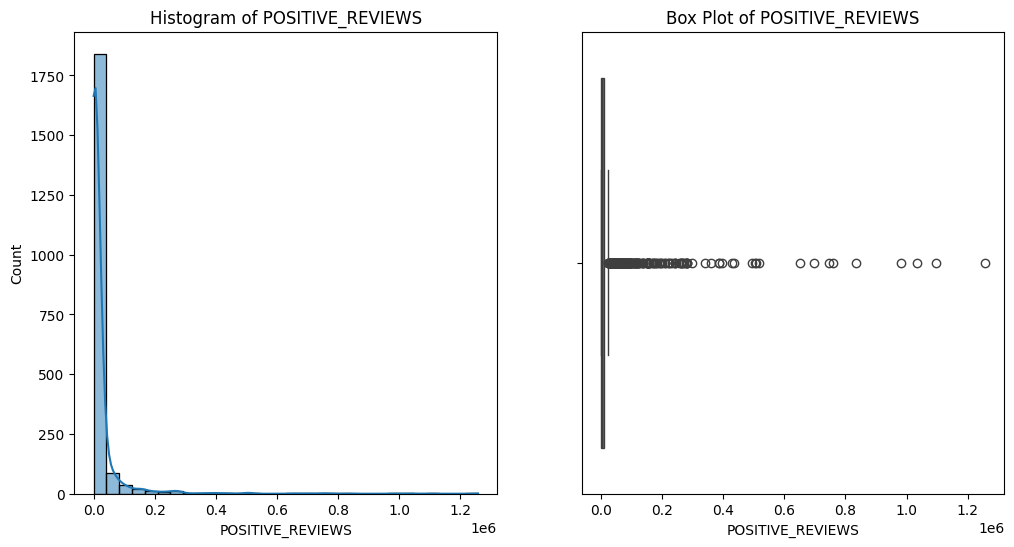

POSITIVE_REVIEWS Statistics:
Mean: 20651.903685503687, Median: 2643.0, Standard Deviation: 76373.09078730969
Number of Outliers: 274
Suggested Method for POSITIVE_REVIEWS: cap
----------------------------------------


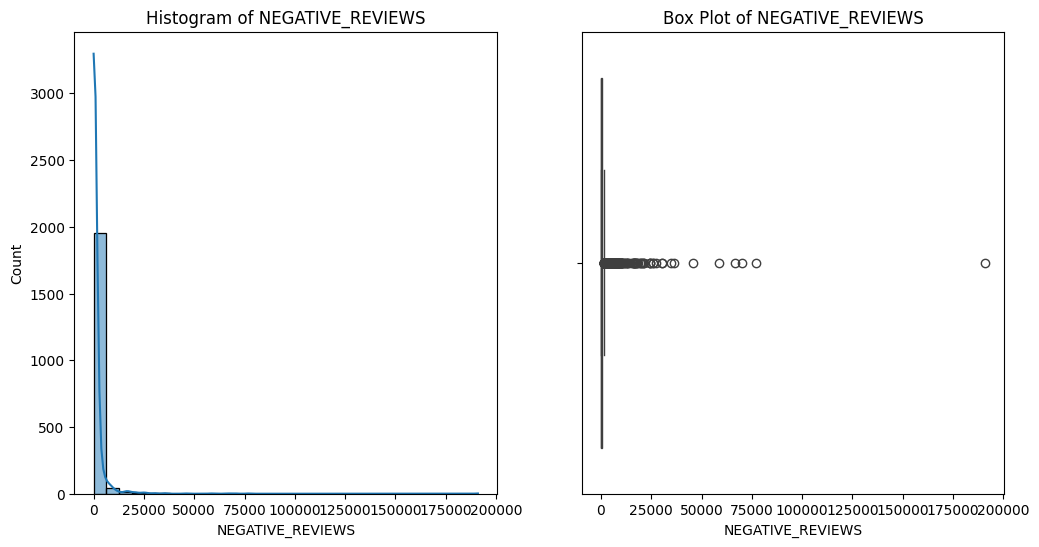

NEGATIVE_REVIEWS Statistics:
Mean: 1278.6422604422605, Median: 138.0, Standard Deviation: 6065.385760816458
Number of Outliers: 295
Suggested Method for NEGATIVE_REVIEWS: cap
----------------------------------------


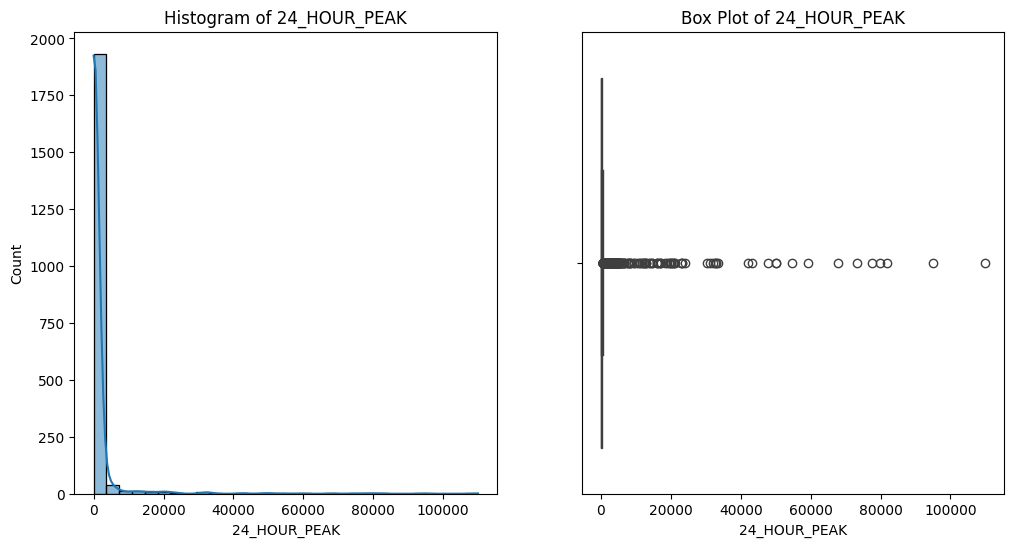

24_HOUR_PEAK Statistics:
Mean: 1184.9592137592138, Median: 37.0, Standard Deviation: 6437.13099938568
Number of Outliers: 329
Suggested Method for 24_HOUR_PEAK: cap
----------------------------------------


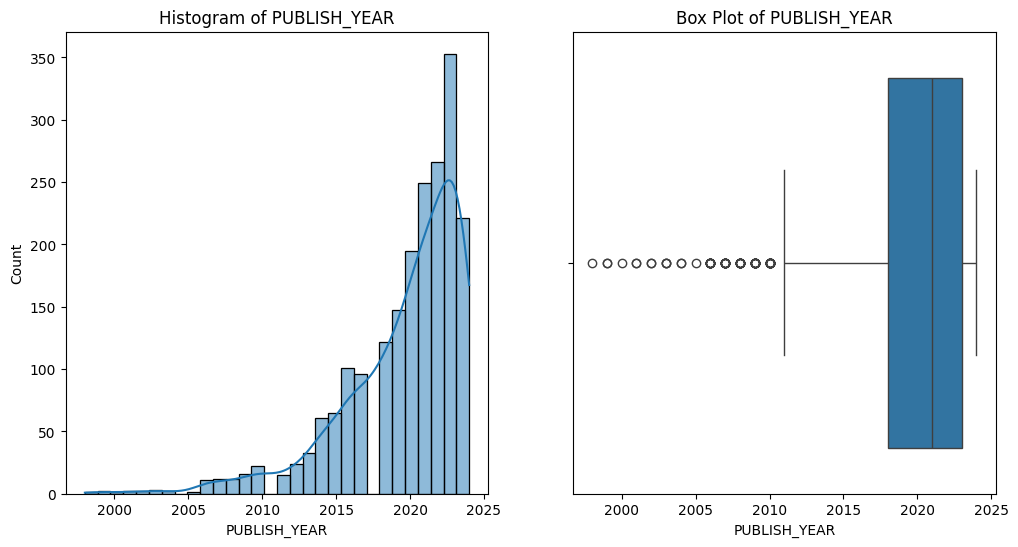

PUBLISH_YEAR Statistics:
Mean: 2019.64914004914, Median: 2021.0, Standard Deviation: 4.080524649296126
Number of Outliers: 87
Suggested Method for PUBLISH_YEAR: remove
----------------------------------------


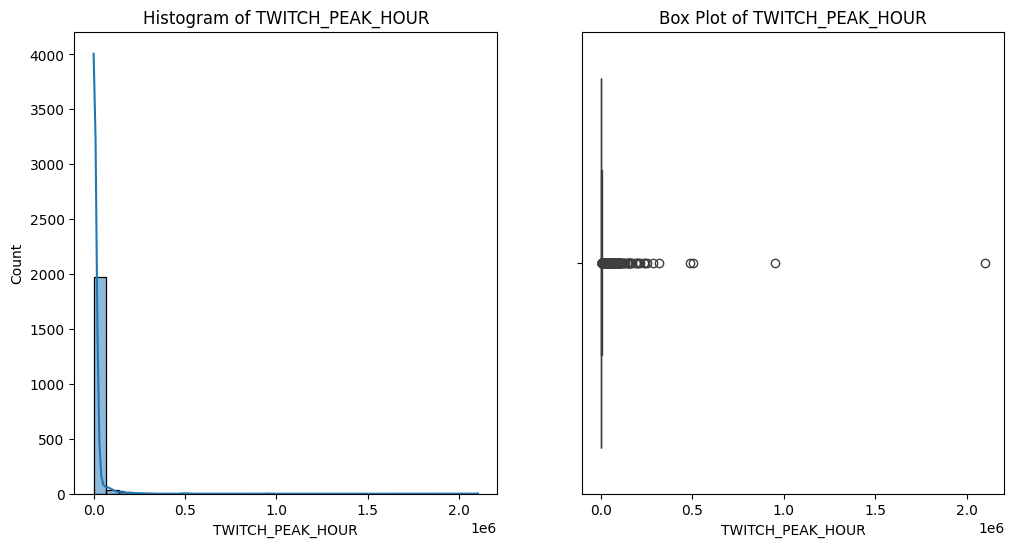

TWITCH_PEAK_HOUR Statistics:
Mean: 8848.108108108108, Median: 540.0, Standard Deviation: 58461.92368706188
Number of Outliers: 315
Suggested Method for TWITCH_PEAK_HOUR: cap
----------------------------------------


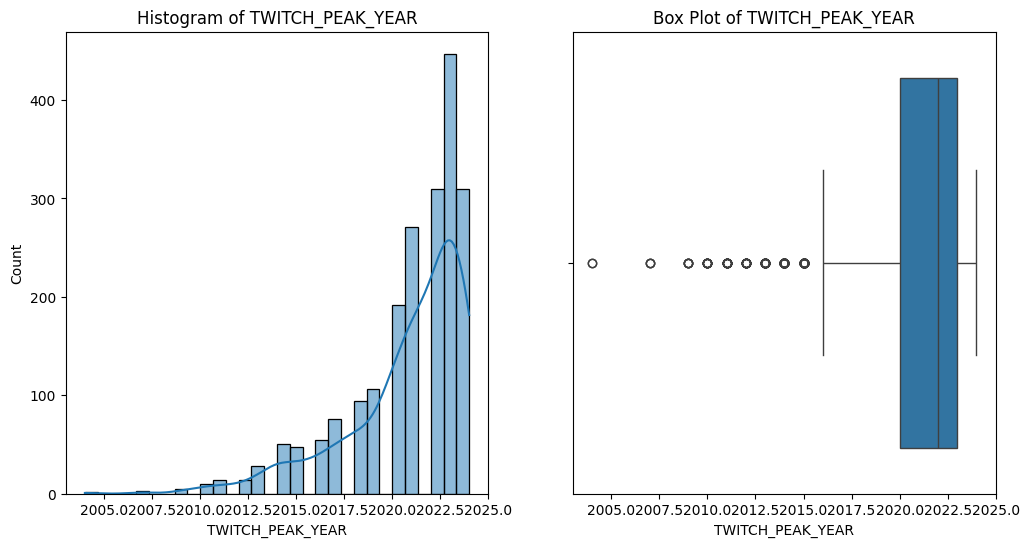

TWITCH_PEAK_YEAR Statistics:
Mean: 2020.7513513513513, Median: 2022.0, Standard Deviation: 3.1691252514351755
Number of Outliers: 174
Suggested Method for TWITCH_PEAK_YEAR: cap
----------------------------------------


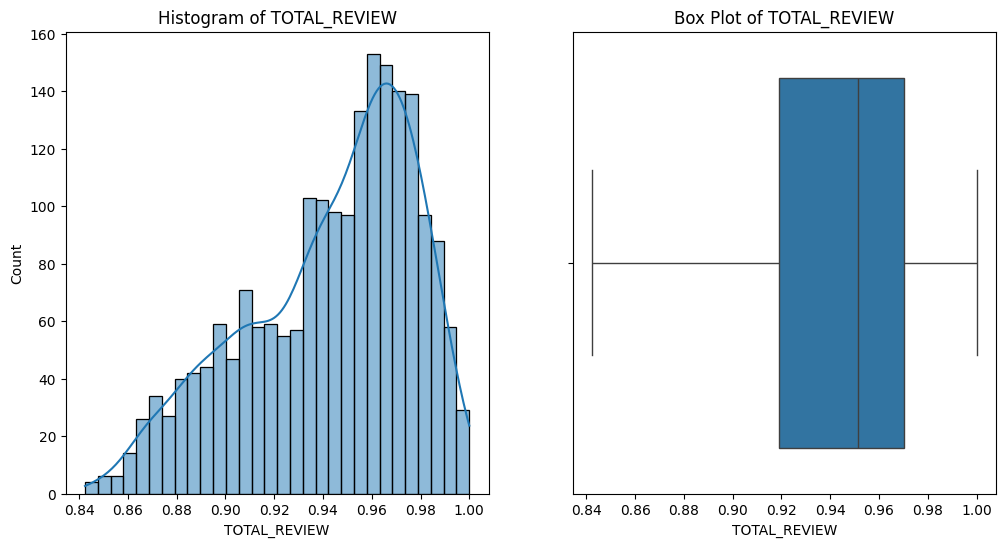

TOTAL_REVIEW Statistics:
Mean: 0.9431112448335125, Median: 0.951219512195122, Standard Deviation: 0.034622883934774674
Number of Outliers: 0
Suggested Method for TOTAL_REVIEW: remove
----------------------------------------


In [118]:
suggested_methods = suggest_outlier_handling_method(df, exclude_columns=['Windows', 'macOS', 'Linux', 'PRICE'])


**Outlier Handling Suggestions:**
- Transform: Suggested if there is a significant skew in the data (mean and median are far apart relative to the standard deviation).
- Remove: Suggested if the number of outliers is low and the data distribution is not heavily skewed.
- Cap: Suggested if the number of outliers is high, indicating that simply removing them might lead to loss of significant data.

In [119]:
suggested_methods

{'RATING_SCORE': 'transform',
 'N_SUPPORTED_LANGUAGES': 'remove',
 'POSITIVE_REVIEWS': 'cap',
 'NEGATIVE_REVIEWS': 'cap',
 '24_HOUR_PEAK': 'cap',
 'PUBLISH_YEAR': 'remove',
 'TWITCH_PEAK_HOUR': 'cap',
 'TWITCH_PEAK_YEAR': 'cap',
 'TOTAL_REVIEW': 'remove'}

In [120]:
def handle_outliers(df, methods, exclude_columns=[]):

    df_cleaned = df.copy()  
    
    for column, method in methods.items():
        if column in exclude_columns:
            continue
        
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if method == 'remove':
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        elif method == 'cap':
            df_cleaned[column] = df_cleaned[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        elif method == 'transform':
            df_cleaned[column] = np.log1p(df_cleaned[column])  
        else:
            raise ValueError("Method must be either 'remove', 'cap', or 'transform'")
    
    return df_cleaned

In [121]:
df = handle_outliers(df, suggested_methods, exclude_columns=['Windows', 'Mac', 'Linux', 'PRICE'])


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 2034
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   1878 non-null   object 
 1   STORE_GENRE            1878 non-null   object 
 2   RATING_SCORE           1878 non-null   float64
 3   N_SUPPORTED_LANGUAGES  1878 non-null   int64  
 4   DEVELOPERS             1878 non-null   object 
 5   POSITIVE_REVIEWS       1878 non-null   float64
 6   NEGATIVE_REVIEWS       1878 non-null   float64
 7   TECHNOLOGIES           1878 non-null   object 
 8   PRICE                  1165 non-null   float64
 9   24_HOUR_PEAK           1878 non-null   float64
 10  PUBLISH_YEAR           1878 non-null   int64  
 11  TWITCH_PEAK_HOUR       1878 non-null   float64
 12  TWITCH_PEAK_YEAR       1878 non-null   float64
 13  TOTAL_REVIEW           1878 non-null   float64
 14  Linux                  1878 non-null   int64  
 15  Windows  

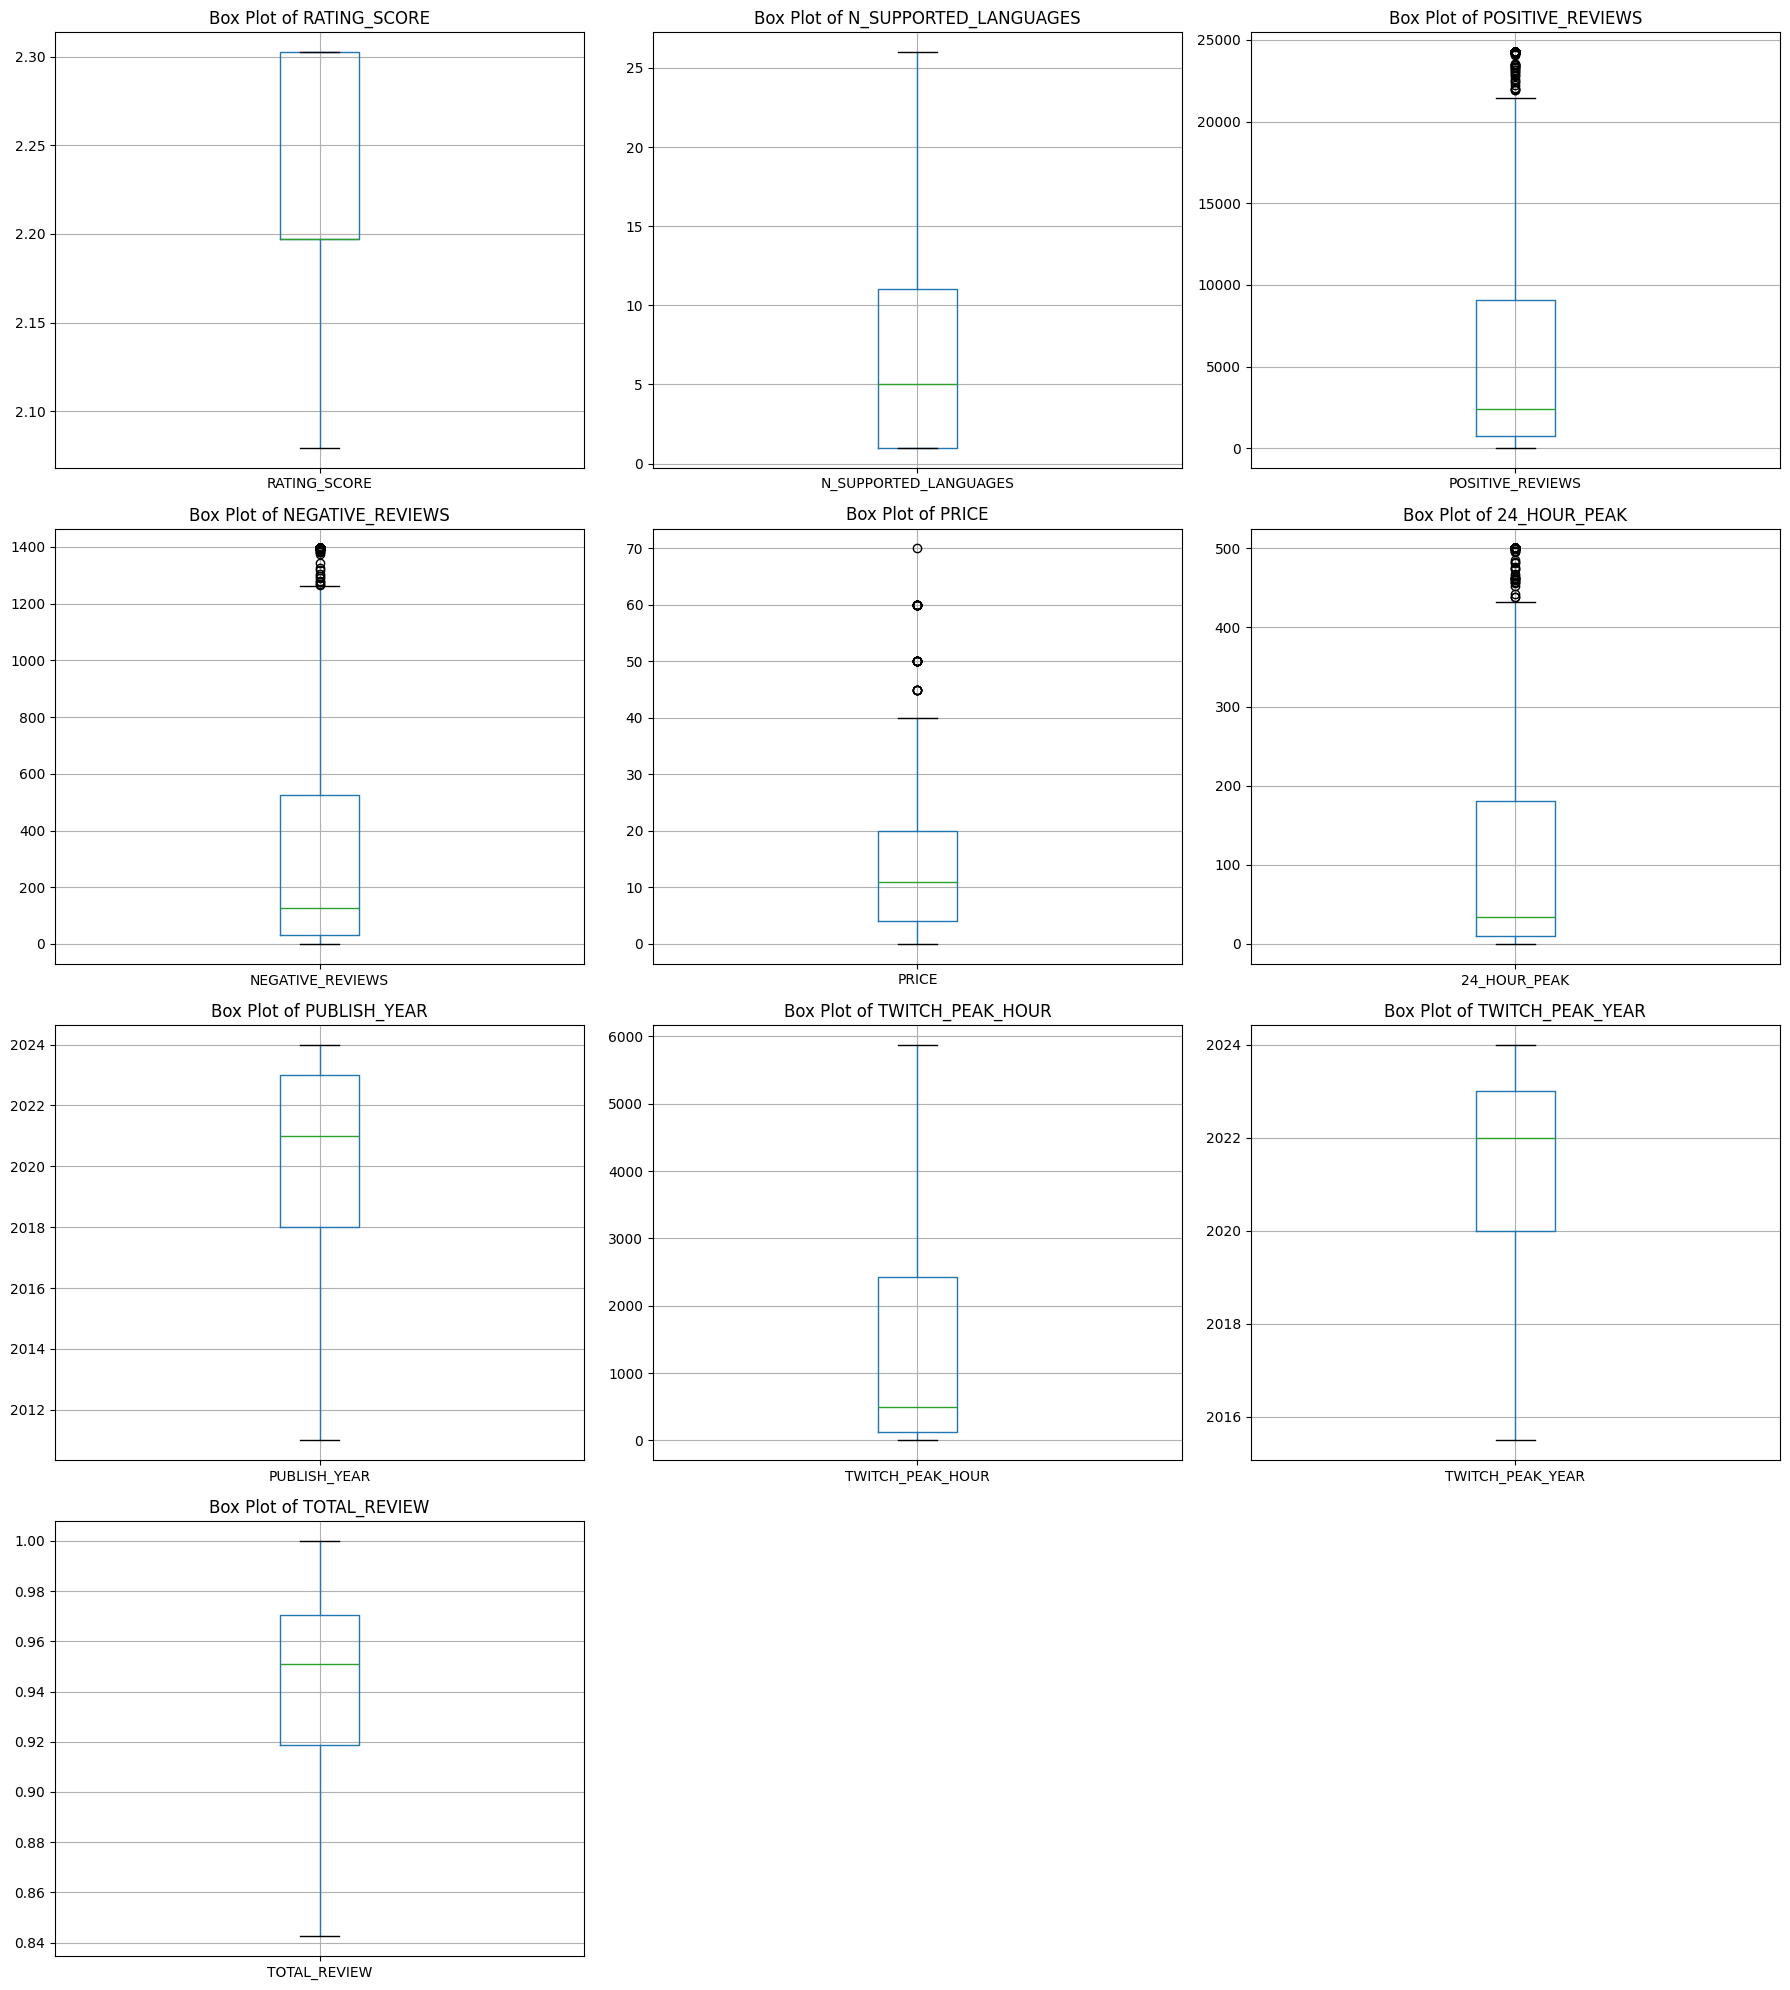

In [123]:
plot_boxplots(df, exclude_columns=['Windows', 'macOS', 'Linux'])


## Normalization/Standardization

In [124]:
# scaler = MinMaxScaler()

# numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# numerical_columns.remove('PRICE')

# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# joblib.dump(scaler, 'minmax_scaler.pkl')

In [125]:
df.describe()

RATING_SCORE  N_SUPPORTED_LANGUAGES  POSITIVE_REVIEWS  \
count   1878.000000            1878.000000       1878.000000   
mean       2.238051               6.780085       6607.913206   
std        0.052822               5.801373       8347.332189   
min        2.079442               1.000000         34.000000   
25%        2.197225               1.000000        722.750000   
50%        2.197225               5.000000       2377.000000   
75%        2.302585              11.000000       9050.750000   
max        2.302585              26.000000      24250.500000   

       NEGATIVE_REVIEWS       PRICE  24_HOUR_PEAK  PUBLISH_YEAR  \
count       1878.000000  1165.00000   1878.000000   1878.000000   
mean         376.117678    13.44879    134.332801   2020.192758   
std          487.434000    12.36014    182.621185      3.141166   
min            0.000000     0.00000      0.000000   2011.000000   
25%           32.000000     3.99000     10.000000   2018.000000   
50%          126.500000    10.99000     34.000000   2021.000000   
75%          524.750000    19.99000    180.750000   2023.000000   
max         1395.000000    69.99000    500.000000   2024.000000   

       TWITCH_PEAK_HOUR  TWITCH_PEAK_YEAR  TOTAL_REVIEW        Linux  \
count       1878.000000       1878.000000   1878.000000  1878.000000   
mean        1650.053248       2021.078807      0.943359     0.243344   
std         2140.652766          2.522867      0.034630     0.429215   
min            3.000000       2015.500000      0.842451     0.000000   
25%          131.250000       2020.000000      0.918863     0.000000   
50%          502.500000       2022.000000      0.950922     0.000000   
75%         2430.250000       2023.000000      0.970572     0.000000   
max         5878.750000       2024.000000      1.000000     1.000000   

           Windows        macOS  
count  1878.000000  1878.000000  
mean      0.988818     0.365282  
std       0.105181     0.481637  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

## Split the dataset into training and testing sets


In [126]:
X = df.drop(columns=['PRICE'])
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
del df
df = pd.concat([X_train, y_train], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502 entries, 1575 to 1201
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   1502 non-null   object 
 1   STORE_GENRE            1502 non-null   object 
 2   RATING_SCORE           1502 non-null   float64
 3   N_SUPPORTED_LANGUAGES  1502 non-null   int64  
 4   DEVELOPERS             1502 non-null   object 
 5   POSITIVE_REVIEWS       1502 non-null   float64
 6   NEGATIVE_REVIEWS       1502 non-null   float64
 7   TECHNOLOGIES           1502 non-null   object 
 8   24_HOUR_PEAK           1502 non-null   float64
 9   PUBLISH_YEAR           1502 non-null   int64  
 10  TWITCH_PEAK_HOUR       1502 non-null   float64
 11  TWITCH_PEAK_YEAR       1502 non-null   float64
 12  TOTAL_REVIEW           1502 non-null   float64
 13  Linux                  1502 non-null   int64  
 14  Windows                1502 non-null   int64  
 15  macOS 

# Analysis 

## Correlation Heatmap

[Text(0.5, 0, 'RATING_SCORE'),
 Text(1.5, 0, 'N_SUPPORTED_LANGUAGES'),
 Text(2.5, 0, 'POSITIVE_REVIEWS'),
 Text(3.5, 0, 'NEGATIVE_REVIEWS'),
 Text(4.5, 0, 'PRICE'),
 Text(5.5, 0, '24_HOUR_PEAK'),
 Text(6.5, 0, 'PUBLISH_YEAR'),
 Text(7.5, 0, 'TWITCH_PEAK_HOUR'),
 Text(8.5, 0, 'TWITCH_PEAK_YEAR'),
 Text(9.5, 0, 'TOTAL_REVIEW')]

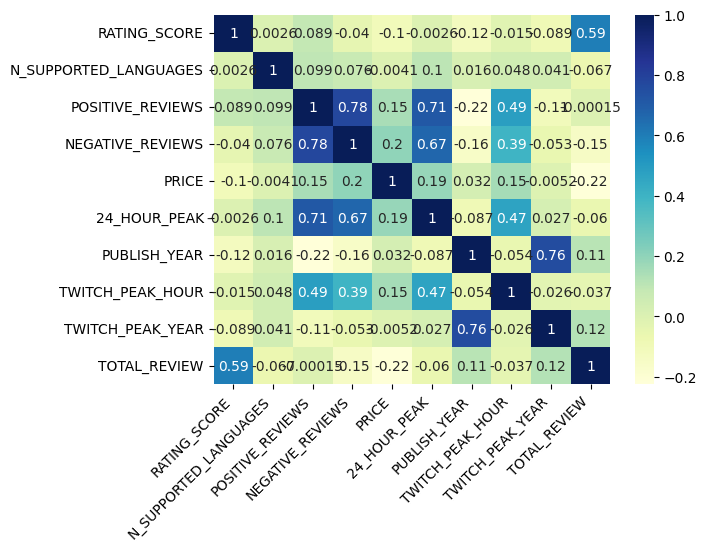

In [129]:
ax = sb.heatmap(numerical_df.corr(),annot=True, cmap="YlGnBu")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [130]:
corr_matrix = numerical_df.corr()
correlations = corr_matrix['PRICE'].abs().sort_values(ascending=False)

correlation_info = pd.DataFrame({
    'Correlation': corr_matrix['PRICE'].loc[correlations.index],
    'Type': ['+' if corr_matrix['PRICE'][col] > 0 else '-' for col in correlations.index]
})

print("\nCorrelation of features with the target (PRICE):")
correlation_info


Correlation of features with the target (PRICE):


Correlation Type
PRICE                     1.000000    +
TOTAL_REVIEW             -0.215768    -
NEGATIVE_REVIEWS          0.197290    +
24_HOUR_PEAK              0.185473    +
TWITCH_PEAK_HOUR          0.153664    +
POSITIVE_REVIEWS          0.145415    +
RATING_SCORE             -0.101201    -
PUBLISH_YEAR              0.031830    +
TWITCH_PEAK_YEAR         -0.005231    -
N_SUPPORTED_LANGUAGES    -0.004117    -

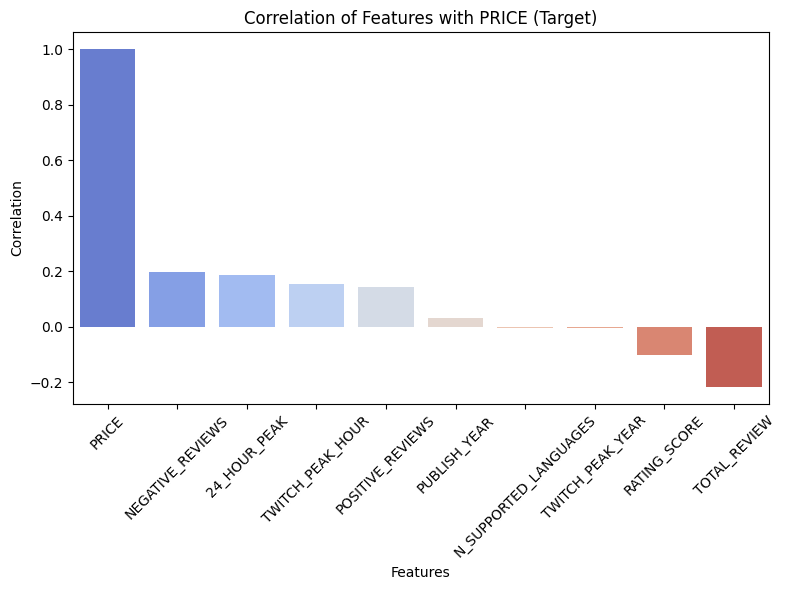

In [132]:
target_corr =  corr_matrix['PRICE'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr, palette='coolwarm')
plt.title('Correlation of Features with PRICE (Target)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Histograms

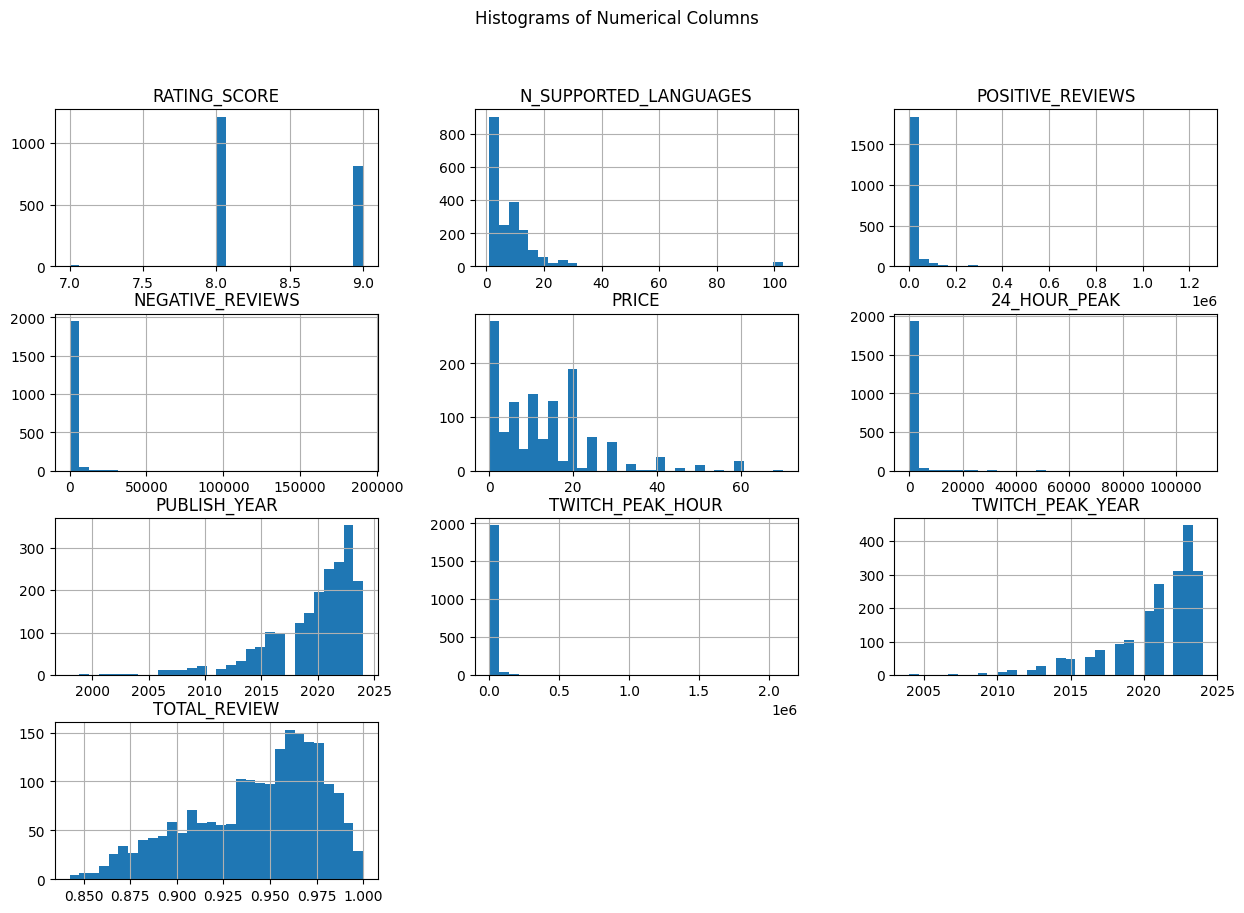

In [133]:
numerical_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

##  Plot pair plot

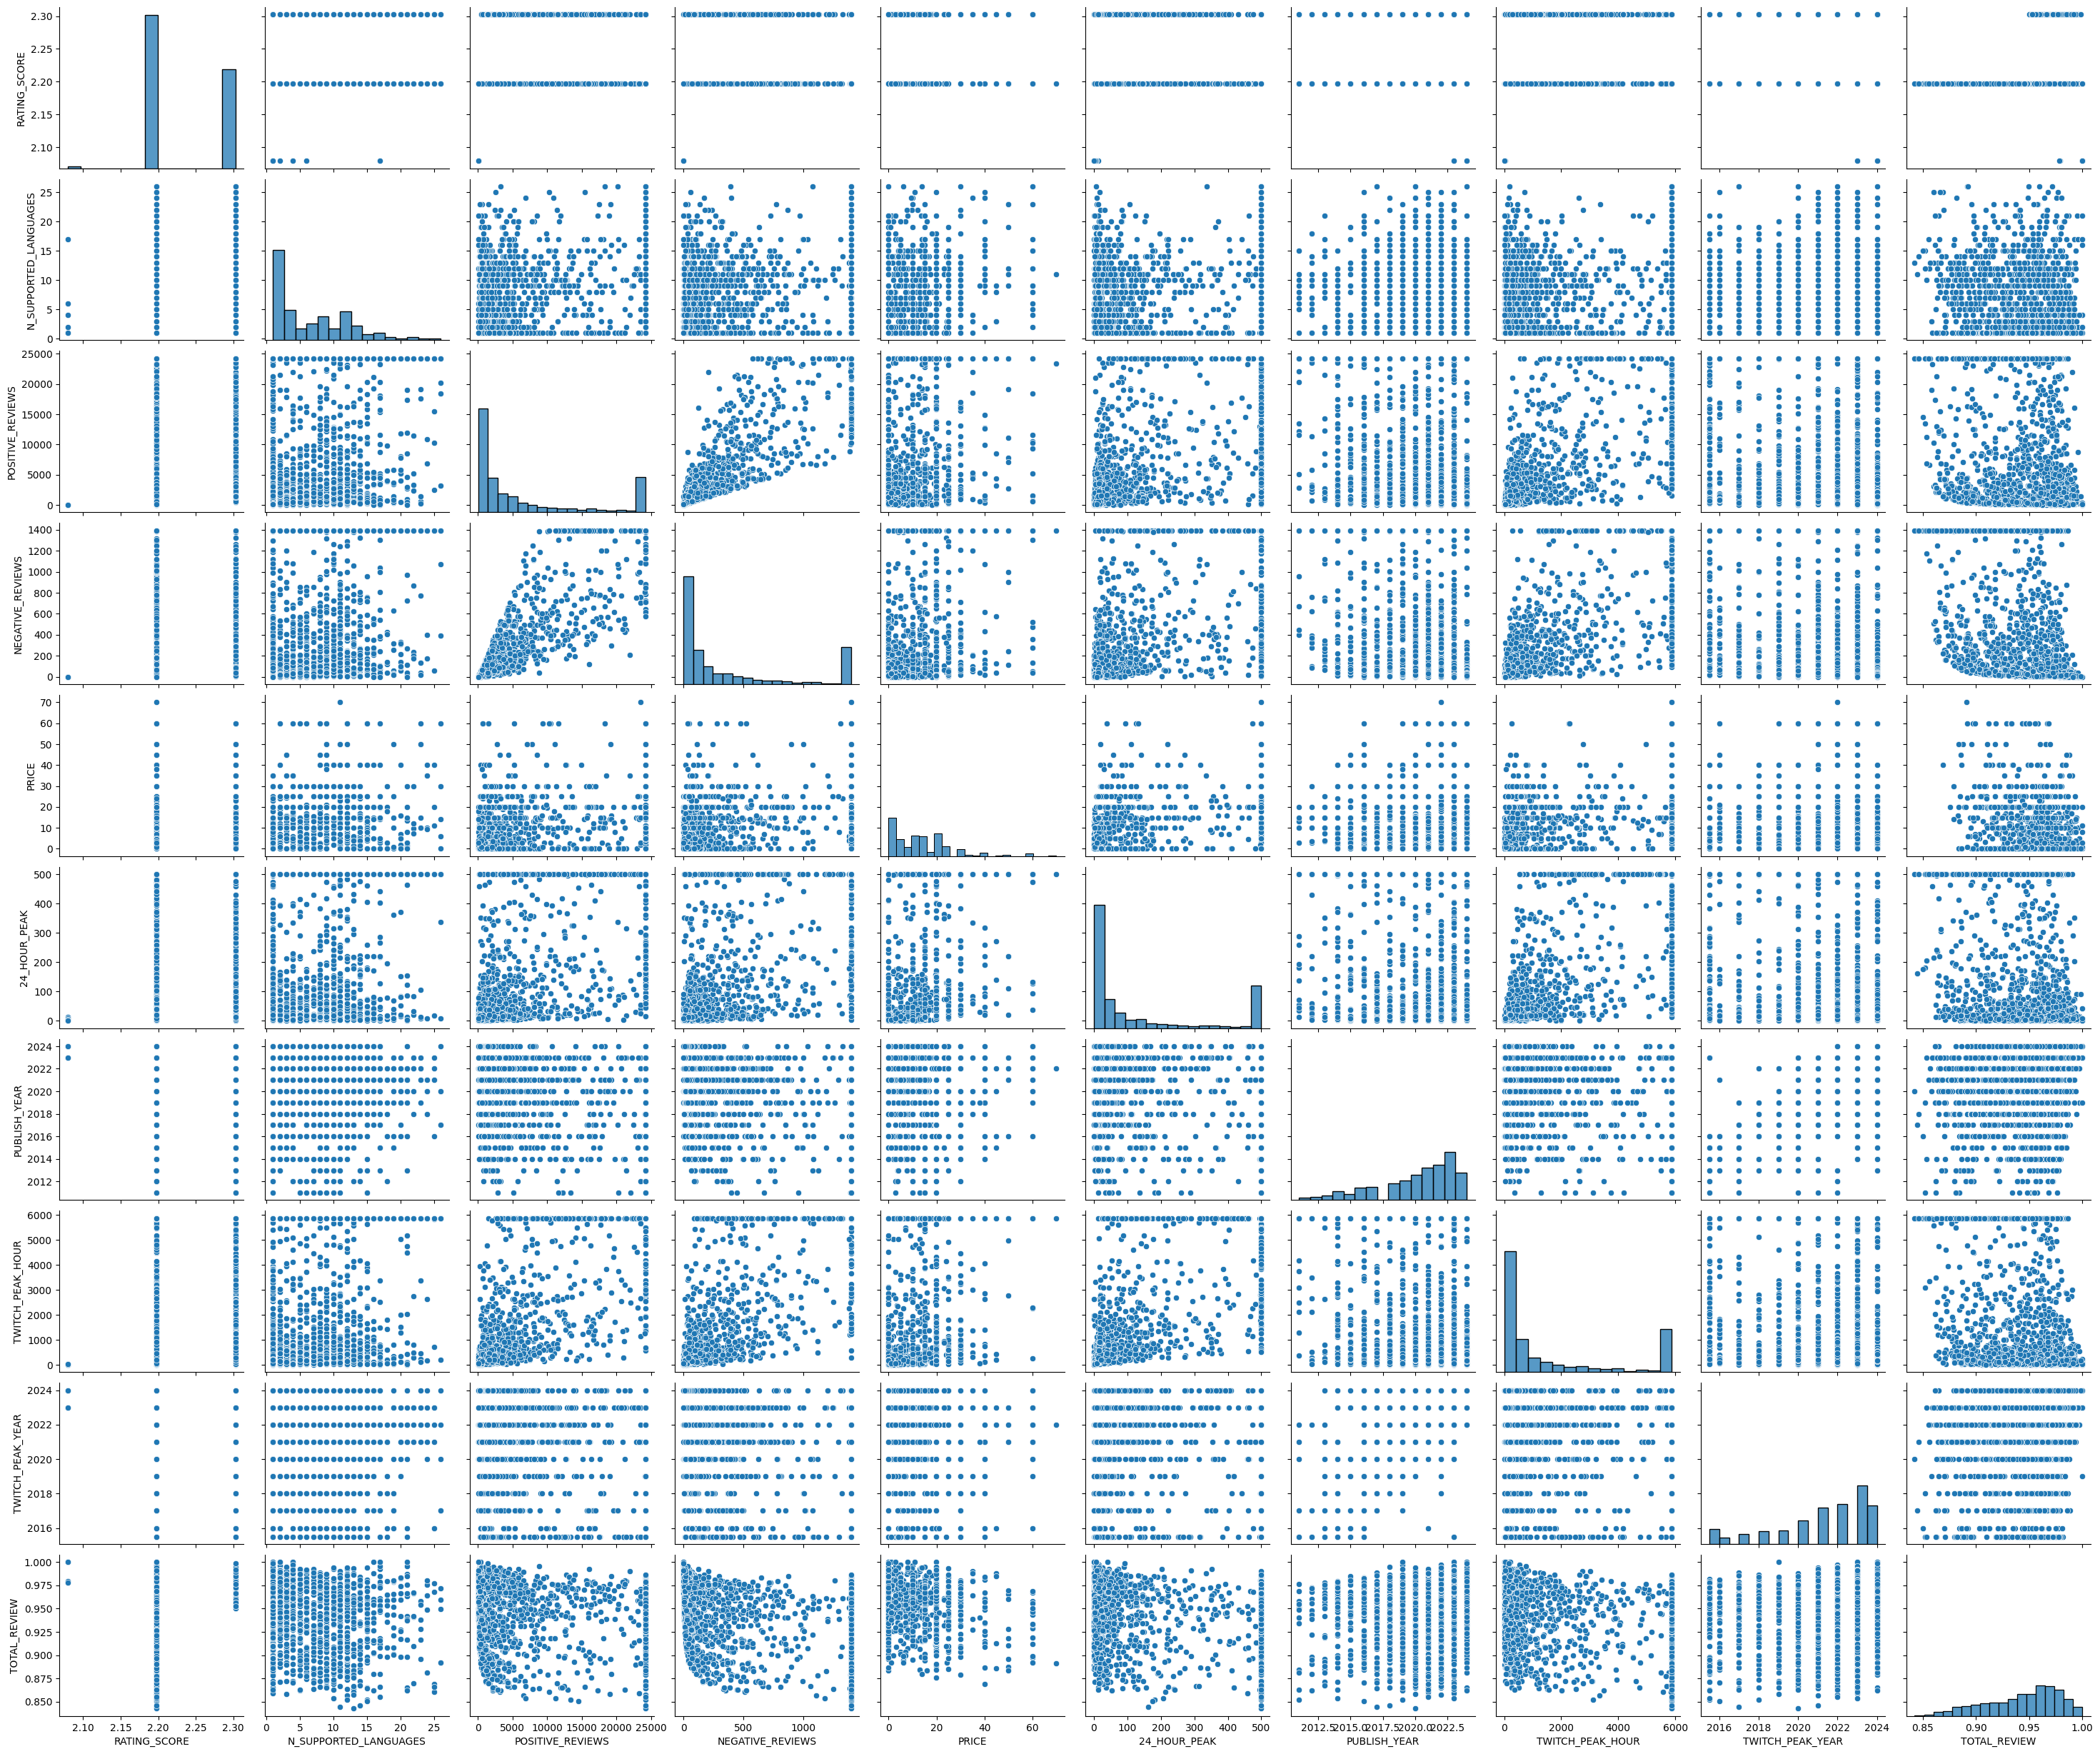

In [134]:
sns.pairplot(df[numerical_df.columns], height=2.5, aspect=1.2)
plt.show()

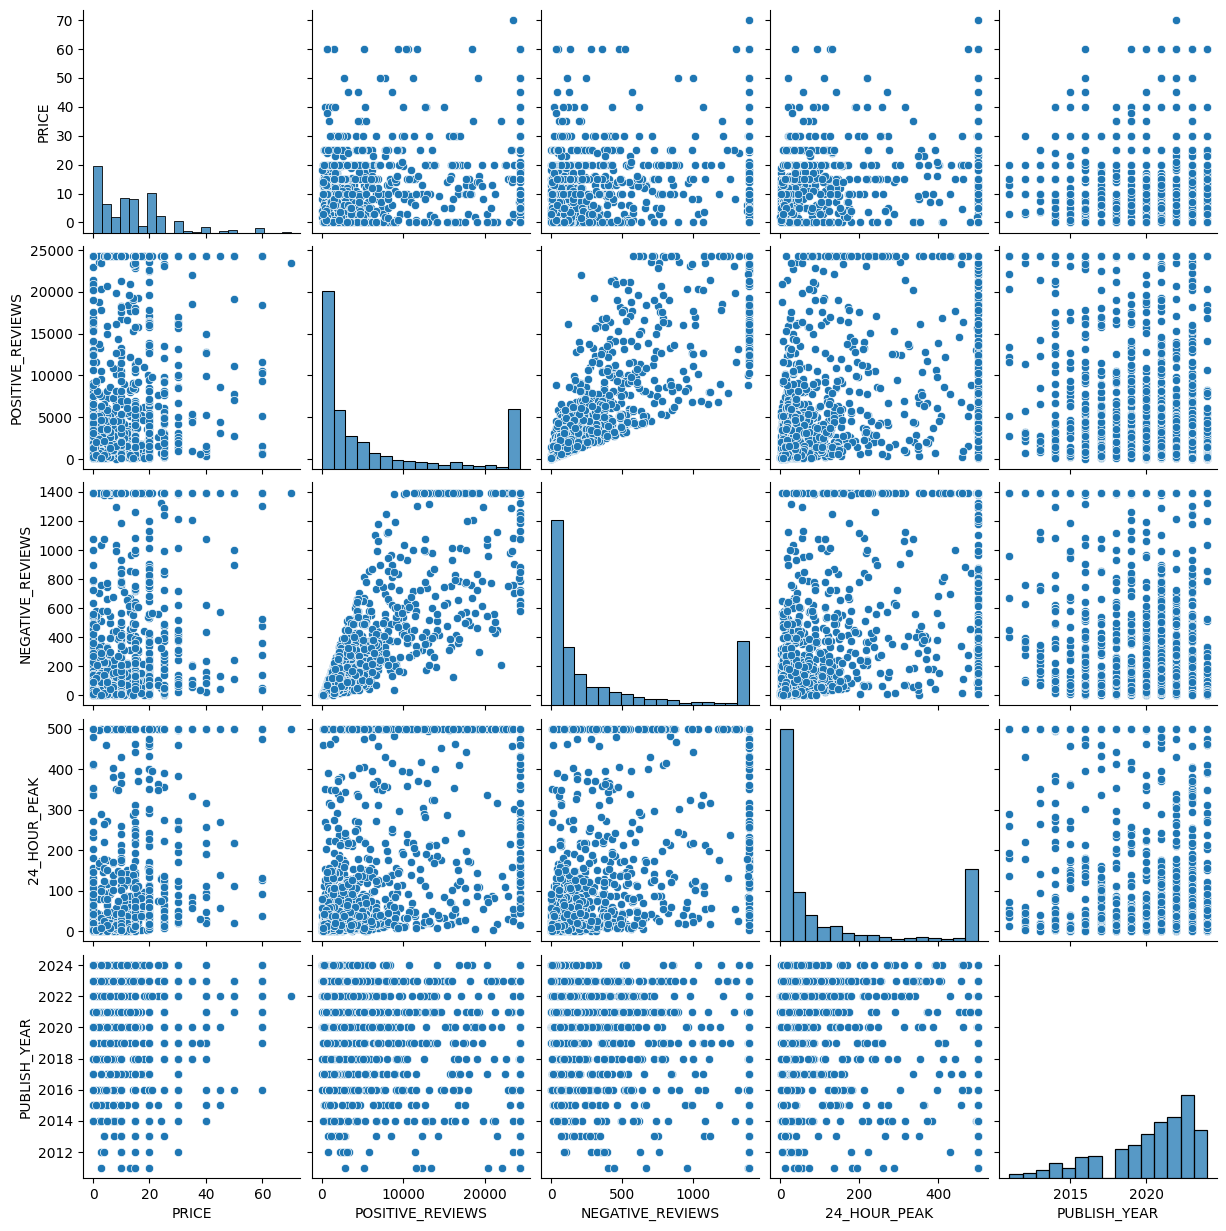

In [135]:
selected_features = ['PRICE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', '24_HOUR_PEAK', 'PUBLISH_YEAR']

sns.pairplot(df[selected_features])
plt.show()

## Scatter Plots

### Summary statistics for the PRICE column

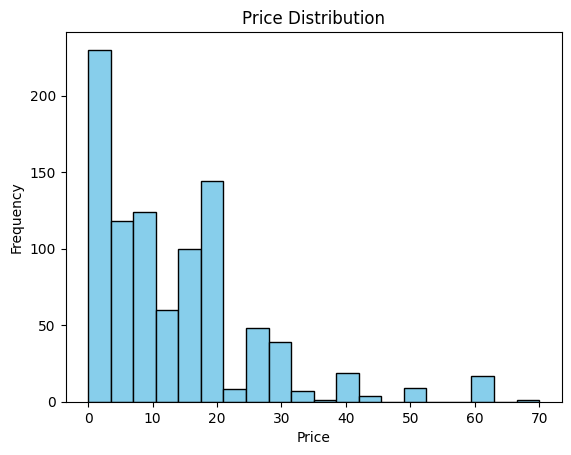

In [171]:
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

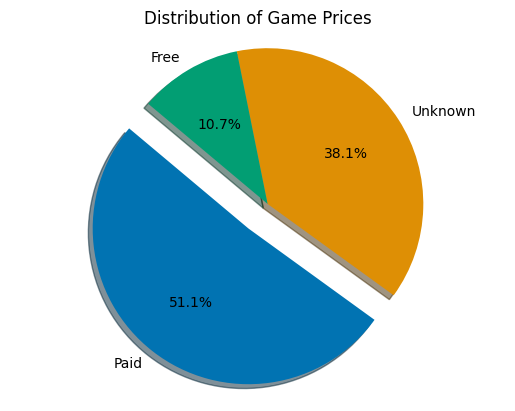

In [175]:
def categorize_price(price):
    if pd.isna(price):
        return "Unknown"
    elif price == 0:
        return "Free"
    else:
        return "Paid"

df = df.assign(PRICE_CATEGORY=df['PRICE'].apply(categorize_price))

price_category_counts = df['PRICE_CATEGORY'].value_counts()

labels = price_category_counts.index
sizes = price_category_counts.values
explode = (0.2, 0, 0) 

with sns.color_palette('colorblind'):
    plt.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Game Prices')
plt.show()

In [176]:
price_summary = df['PRICE'].describe()
price_summary

count    929.000000
mean      13.344672
std       12.531510
min        0.000000
25%        3.740000
50%        9.990000
75%       19.990000
max       69.990000
Name: PRICE, dtype: float64

### Distribution of Publish Year

In [152]:
median_publish_year = df['PUBLISH_YEAR'].median()
filled_publish_year = df['PUBLISH_YEAR'].fillna(median_publish_year)

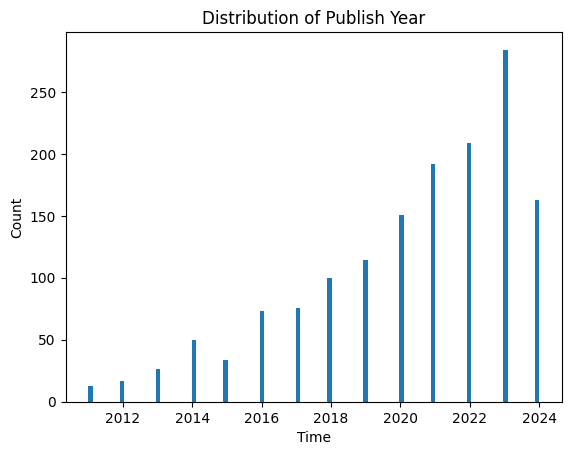

In [153]:
# Plot the histogram
plt.hist(filled_publish_year, bins=100)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Publish Year')
plt.show()


### Plot the average price for each year

In [157]:
print(sorted(df["PUBLISH_YEAR"].unique()))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


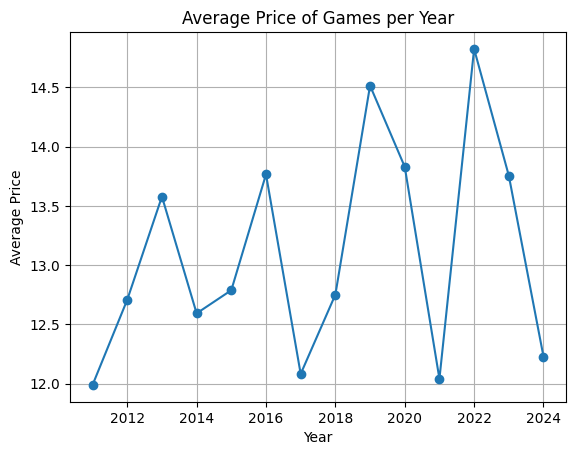

In [158]:
average_price_per_year = df.groupby('PUBLISH_YEAR')['PRICE'].mean()

# Plot the average price for each year
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Games per Year')
plt.grid(True)
plt.show()

### Platform Analysis

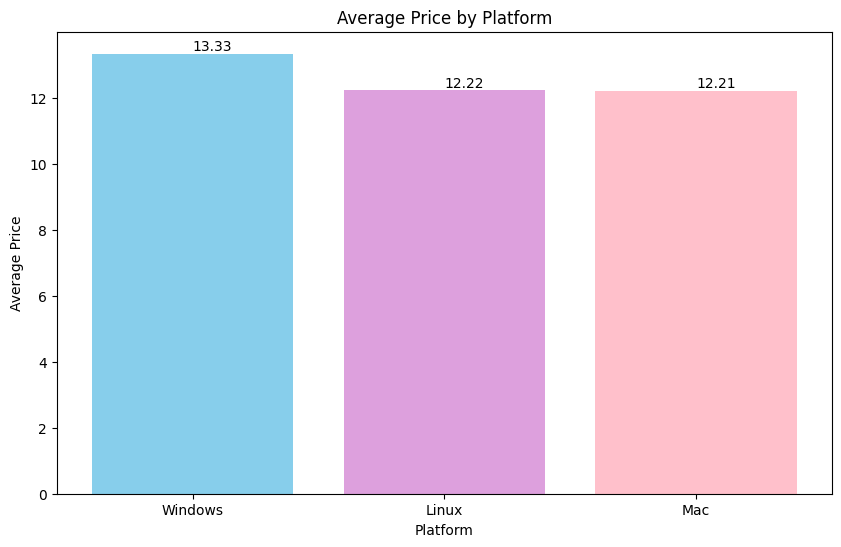

In [154]:
windows_avg_price = df.loc[df['Windows'] == 1, 'PRICE'].mean()
linux_avg_price = df.loc[df['Linux'] == 1, 'PRICE'].mean()
mac_avg_price = df.loc[df['macOS'] == 1, 'PRICE'].mean()

platforms = ['Windows', 'Linux', 'Mac']
average_prices = [windows_avg_price, linux_avg_price, mac_avg_price]
colors = ['skyblue', 'plum', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(platforms, average_prices, color=colors)

for bar, avg_price in zip(bars, average_prices):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg_price, 2), va='bottom')  # va: vertical alignment

plt.title('Average Price by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Price')
plt.show()

In [155]:

df['PlatformCount'] = df[['Windows', 'Linux', 'macOS']].sum(axis=1)

platform_groups = df.groupby('PlatformCount').agg({
    'RATING_SCORE': 'mean',
    'POSITIVE_REVIEWS': 'mean',
    'PRICE': 'mean',
    'NEGATIVE_REVIEWS': 'mean',
})

platform_groups.reset_index(inplace=True)

platform_groups

PlatformCount  RATING_SCORE  POSITIVE_REVIEWS      PRICE  NEGATIVE_REVIEWS
0              0      2.203422      10326.176471  16.990000        712.058824
1              1      2.233809       5853.622933  14.318610        340.434399
2              2      2.241993       6822.948718  11.354444        380.216117
3              3      2.246969       8344.178689  12.534323        447.593443

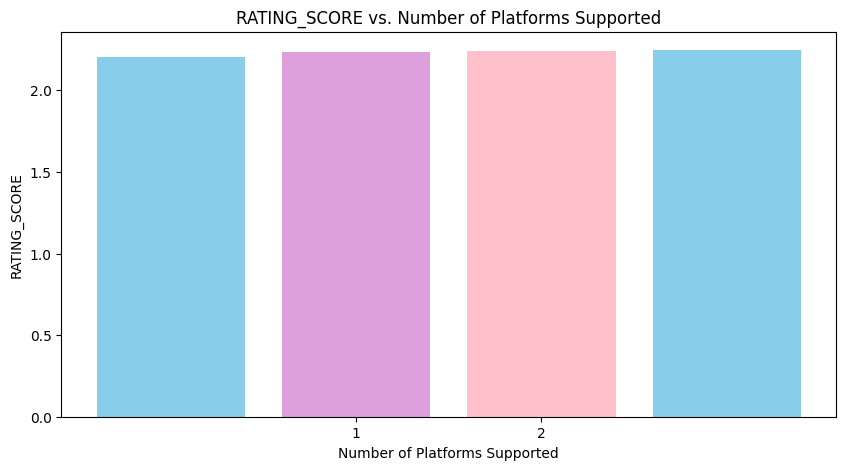

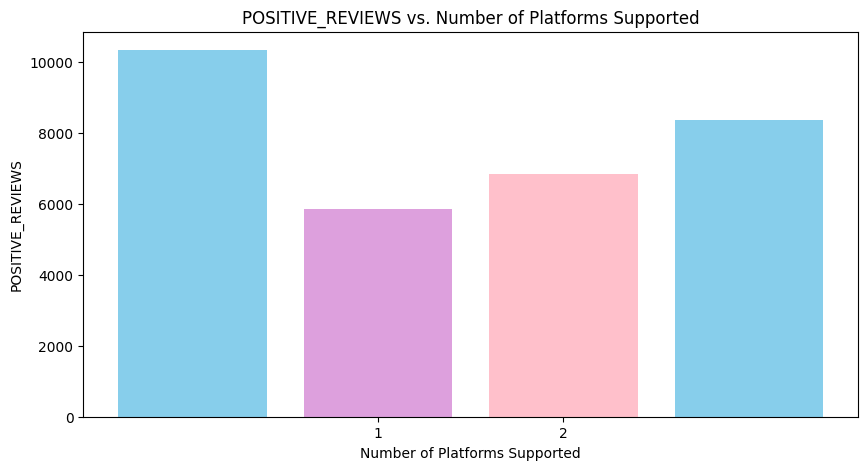

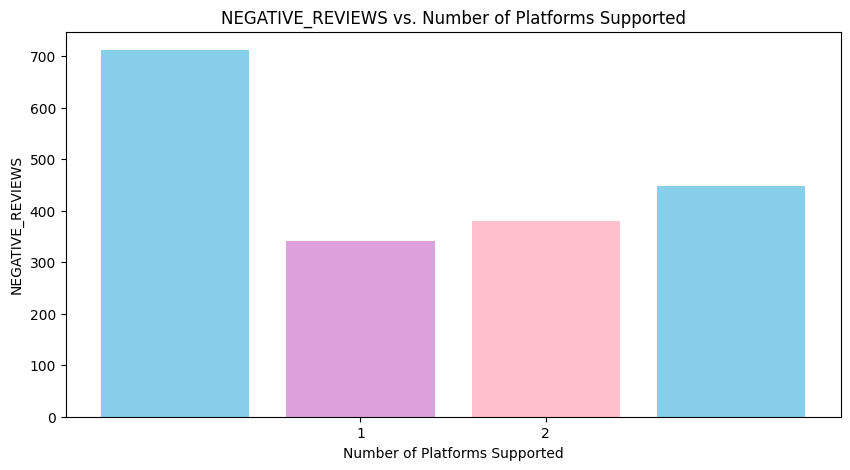

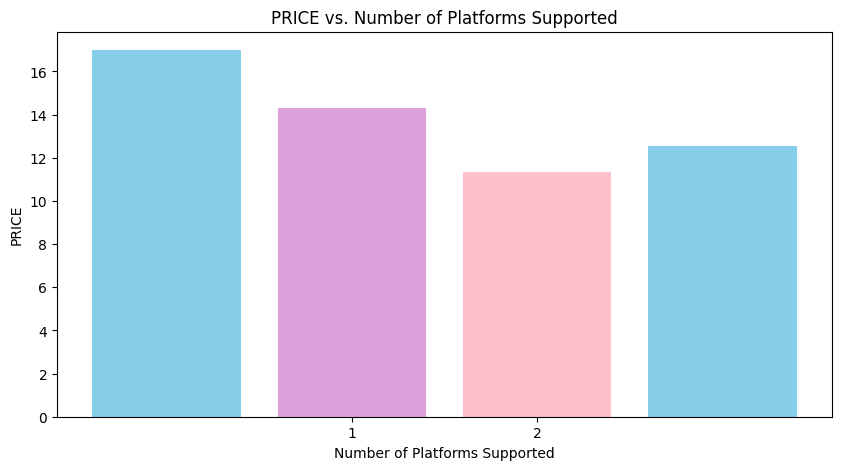

In [156]:
colors = ['skyblue', 'plum', 'pink']
metrics = ['RATING_SCORE', 'POSITIVE_REVIEWS', 'NEGATIVE_REVIEWS', 'PRICE']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(platform_groups['PlatformCount'], platform_groups[metric], color=colors)
    plt.xlabel('Number of Platforms Supported')
    plt.ylabel(metric)
    plt.title(f'{metric} vs. Number of Platforms Supported')
    plt.xticks(range(1, 3))
    plt.show()

###  Relation between Price and Genre

In [167]:
df['STORE_GENRE'] = df['STORE_GENRE'].astype(str)

df['PRIMARY_GENRE'] = df['STORE_GENRE'].apply(lambda x: re.findall(r'\b[A-Za-z]+\b', x)[0] if re.findall(r'\b[A-Za-z]+\b', x) else None)


Mean Prices by Genre


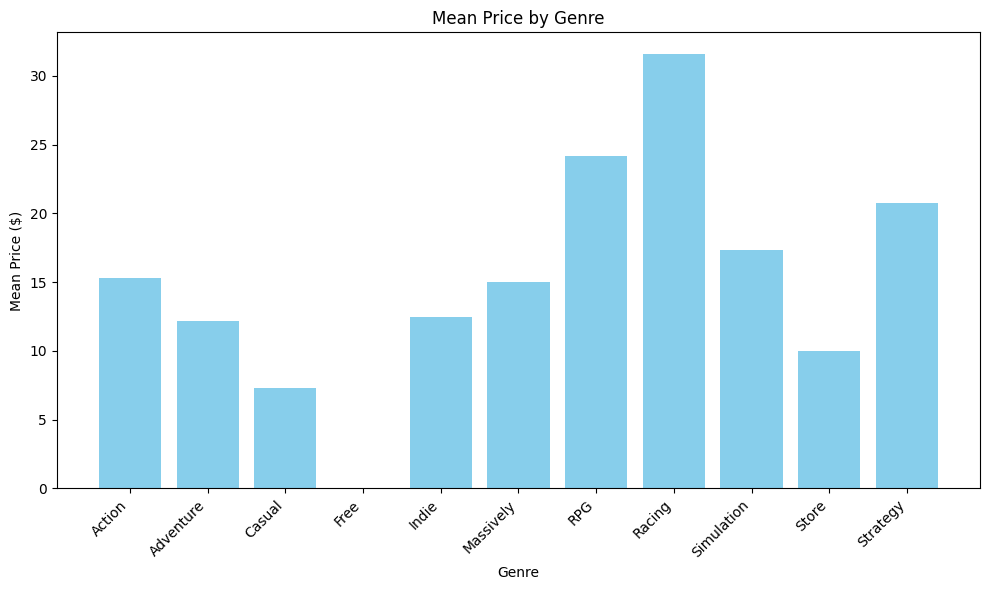

In [169]:
# Mean Price Difference by Genre
print("Mean Prices by Genre")
mean_prices_by_genre = df.groupby('PRIMARY_GENRE')['PRICE'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_prices_by_genre['PRIMARY_GENRE'], mean_prices_by_genre['PRICE'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 20 Games by Genre


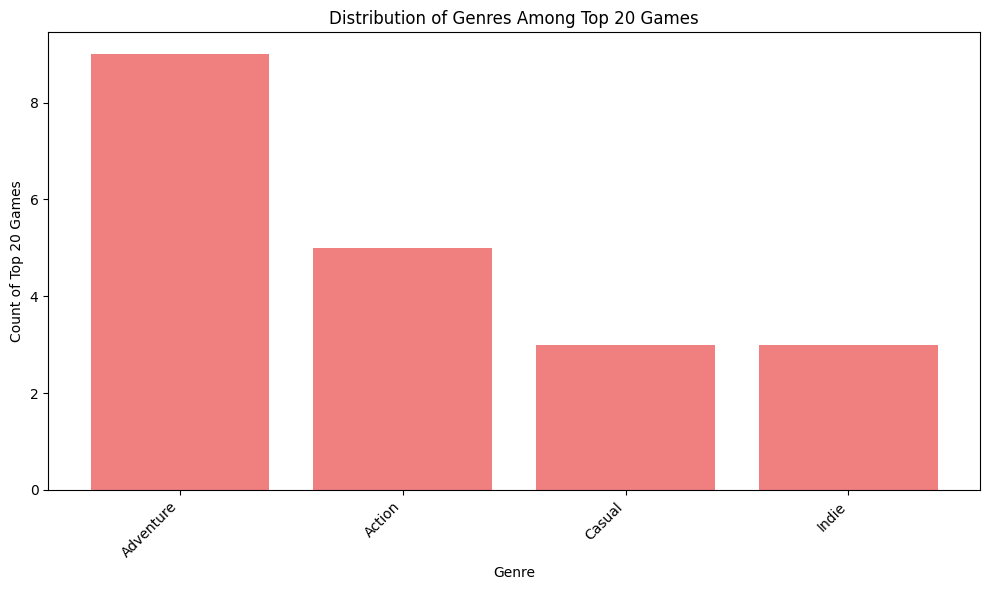

In [170]:
# Comparison of Top 20 Games based on Genre

top_20_games = df.sort_values(by='RATING_SCORE', ascending=False).head(20)

top_20_genre_counts = top_20_games['PRIMARY_GENRE'].value_counts().reset_index()
top_20_genre_counts.columns = ['PRIMARY_GENRE', 'COUNT']
print("Top 20 Games by Genre")

plt.figure(figsize=(10, 6))
plt.bar(top_20_genre_counts['PRIMARY_GENRE'], top_20_genre_counts['COUNT'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count of Top 20 Games')
plt.title('Distribution of Genres Among Top 20 Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 GENRES

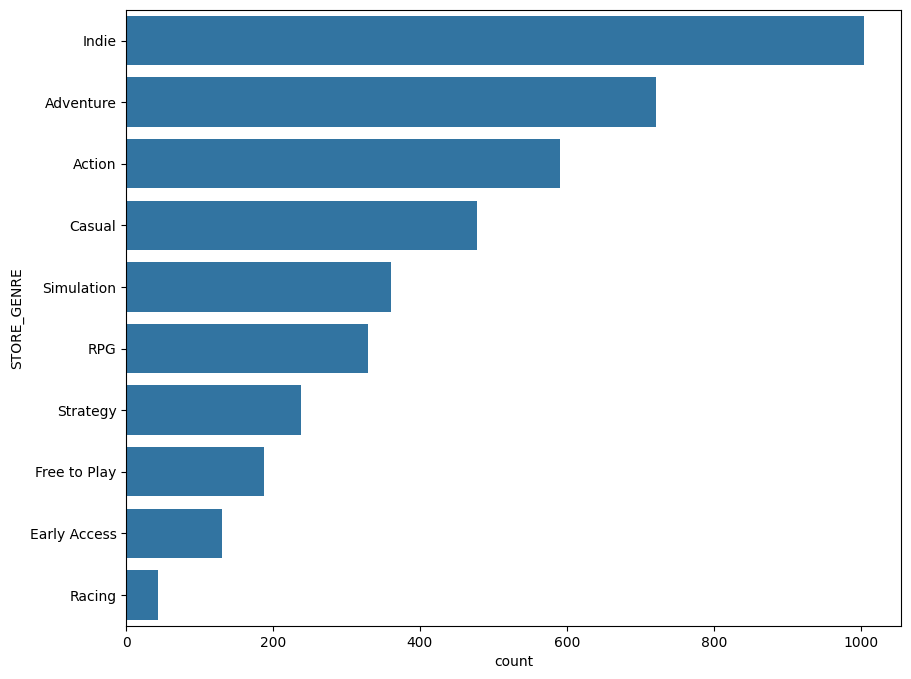

In [147]:
# Explode

df['STORE_GENRE'] = df['STORE_GENRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_exploded = df.explode('STORE_GENRE')

top_10_genre = df_exploded['STORE_GENRE'].value_counts().nlargest(10).index

df_top_10 = df_exploded[df_exploded['STORE_GENRE'].isin(top_10_genre)]

plt.figure(figsize=(10, 8))

sb.countplot(y='STORE_GENRE', data=df_top_10, order=top_10_genre)
plt.show()

In [150]:
warnings.filterwarnings("ignore")

df['STORE_GENRE'] = df['STORE_GENRE'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_exploded = df.explode('STORE_GENRE')

genre_avg_price = df_exploded.groupby('STORE_GENRE')['PRICE'].mean().reset_index()

quantiles = genre_avg_price['PRICE'].quantile([0.33, 0.66])

def categorize_price(price):
    if price <= quantiles[0.33]:
        return 'Low'
    elif price <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

genre_avg_price['Price_Category'] = genre_avg_price['PRICE'].apply(categorize_price)

categories = ['High', 'Medium', 'Low']
colors = ['Blues_d', 'Greens_d', 'Reds_d']

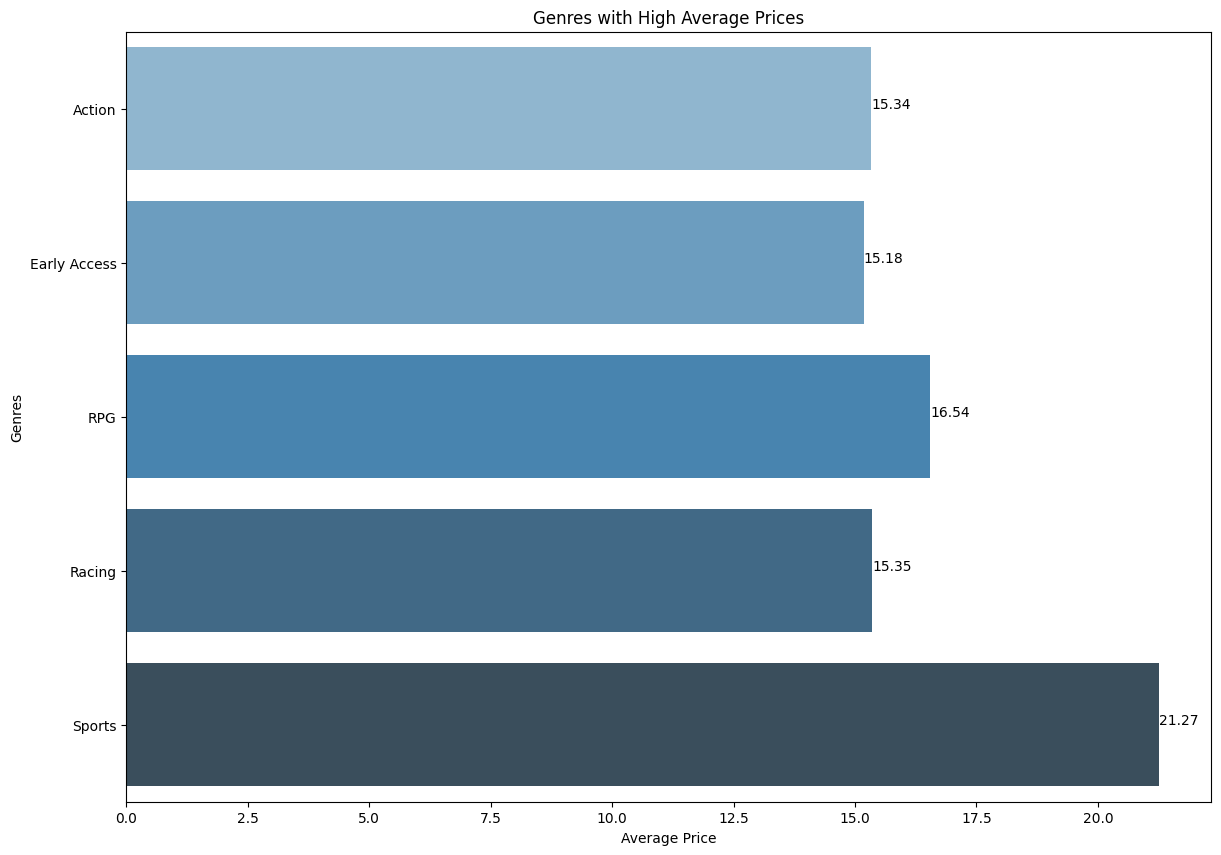

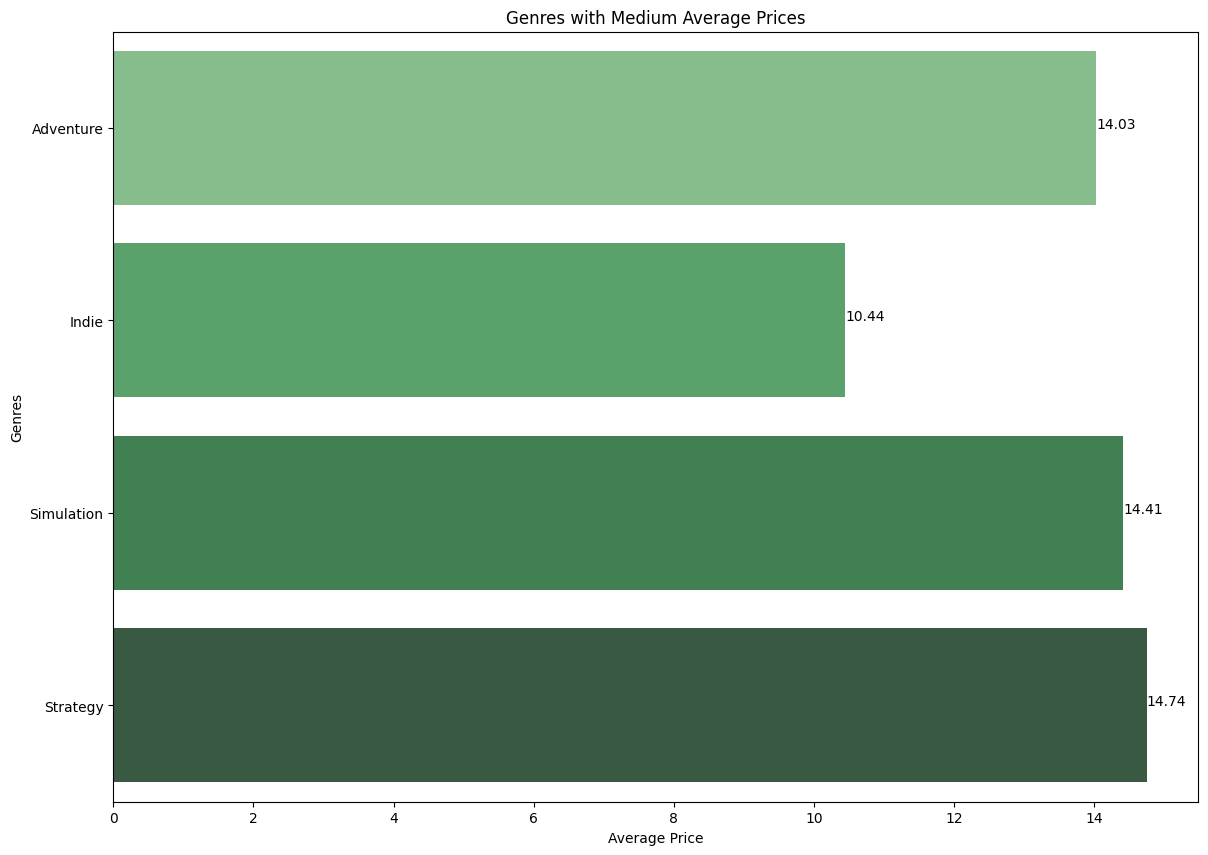

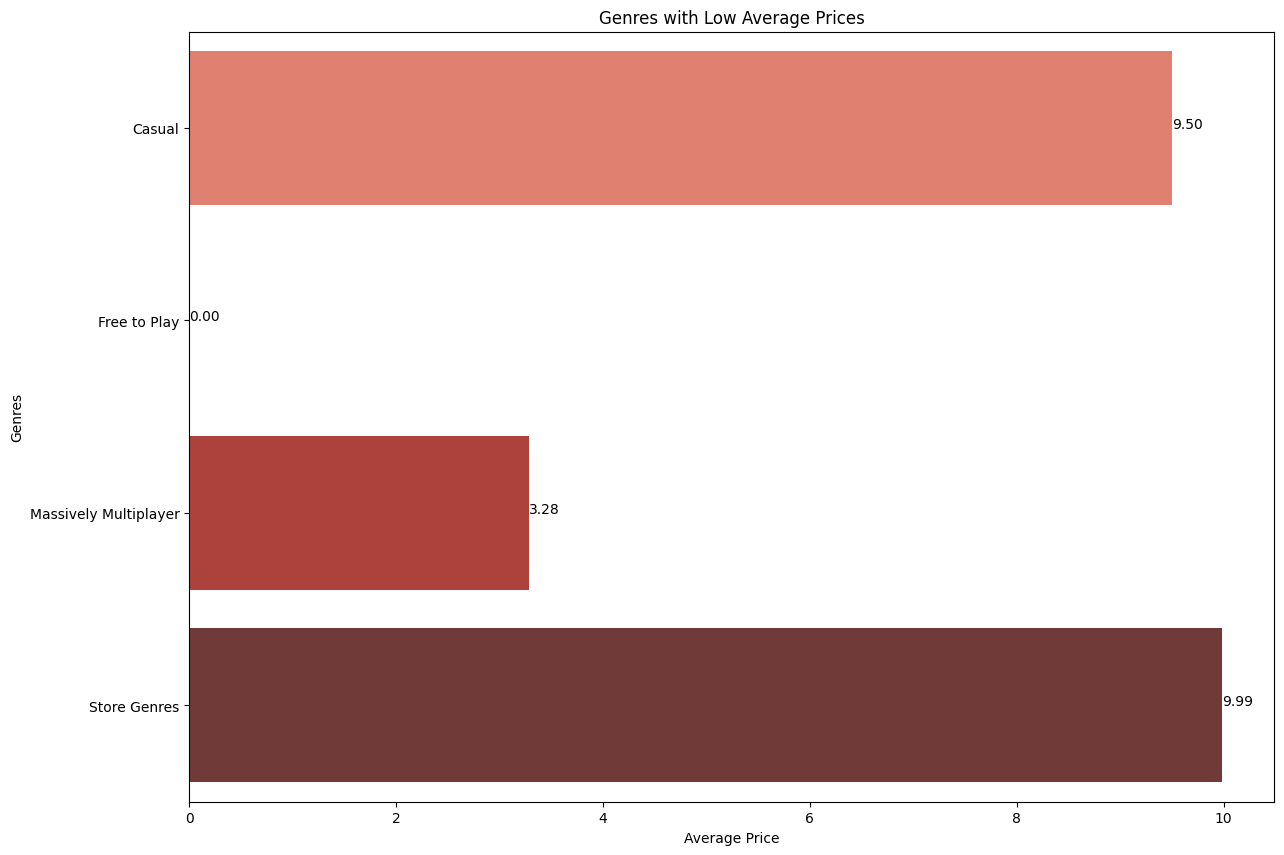

In [151]:
for category, color in zip(categories, colors):
    category_df = genre_avg_price[genre_avg_price['Price_Category'] == category]
    
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(y='STORE_GENRE', x='PRICE', data=category_df, palette=color)
    plt.title(f'Genres with {category} Average Prices')
    plt.xlabel('Average Price')
    plt.ylabel('Genres')
    
    # Annotate the bars with the average price values
    for index, value in enumerate(category_df['PRICE']):
        ax.text(value, index, f'{value:.2f}', color='black', ha="left")
    
    plt.show()

### Analyze the correlation between PRICE and POSITIVE_REVIEWS

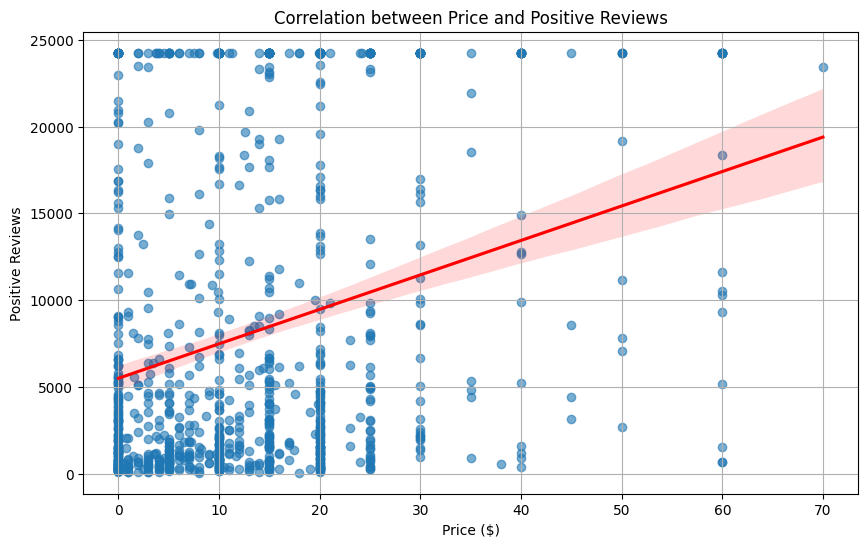

0.2791102620741889

In [178]:

price_positive_corr = df[['PRICE', 'POSITIVE_REVIEWS']].dropna()
correlation = price_positive_corr.corr().loc['PRICE', 'POSITIVE_REVIEWS']

plt.figure(figsize=(10, 6))
sns.regplot(x='PRICE', y='POSITIVE_REVIEWS', data=price_positive_corr, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Price and Positive Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Positive Reviews')
plt.grid(True)
plt.show()

correlation

### Developer Analysis

In [179]:
developer_game_count = df['DEVELOPERS'].value_counts()

developer_price_summary = df.groupby('DEVELOPERS')['PRICE'].mean().sort_values(ascending=False)

developer_summary = pd.DataFrame({
    'Game Count': developer_game_count,
    'Average Price': developer_price_summary
}).dropna().sort_values(by='Game Count', ascending=False)

developer_summary

Game Count  Average Price
DEVELOPERS                                      
Square Enix                    13      43.275714
CAPCOM Co., Ltd.                8      14.790000
Anatoliy Loginovskikh           7       0.867500
Klei Entertainment              7      15.705714
Rusty Lake                      7       2.850000
...                           ...            ...
HuniePot                        1       9.990000
Huw Millward                    1       9.990000
Hyper Games                     1      19.990000
IDEA FACTORY                    1      19.990000
越青                              1       0.000000

[798 rows x 2 columns]

### Top 20 DEVELOPERS

In [142]:

warnings.filterwarnings("ignore")

df_exploded = df.explode('DEVELOPERS')

developer_avg_price = df_exploded.groupby('DEVELOPERS')['PRICE'].mean().reset_index()

grouped = developer_avg_price.groupby('PRICE')['DEVELOPERS'].apply(lambda x: ', '.join(x)).reset_index()

grouped.columns = ['Average Price', 'Developers']

developer_groups = {f'Group {i+1}': names for i, names in enumerate(grouped['Developers'])}

grouped['Developers'] = [f'Group {i+1}' for i in range(len(grouped))]

grouped_sorted = grouped.sort_values(by='Average Price', ascending=False)

top_10_highest_avg_price = grouped_sorted.head(10)

top_10_lowest_avg_price = grouped_sorted.tail(10)

normal_avg_price = grouped_sorted.iloc[10:-10].head(10)

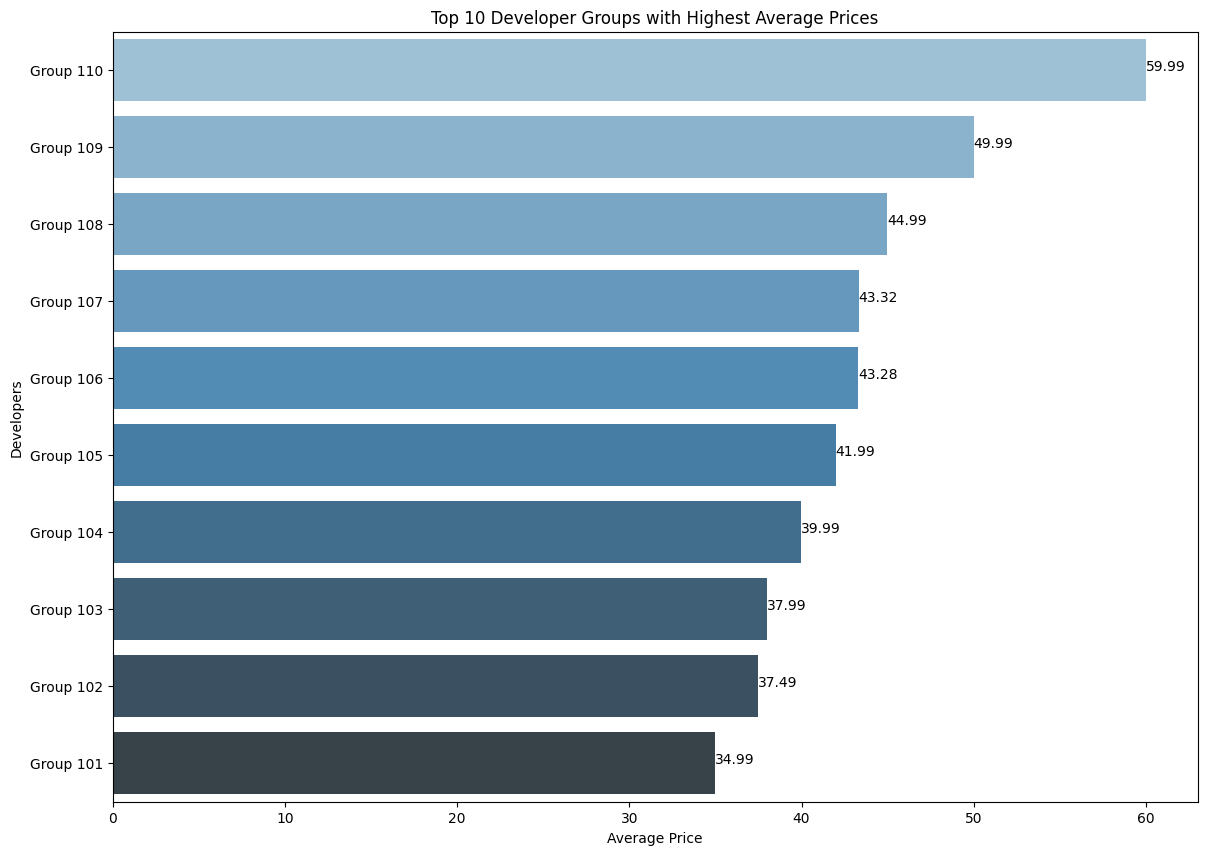

In [143]:
# Plot the top groups with highest average prices
plt.figure(figsize=(14, 10))
ax1 = sns.barplot(y='Developers', x='Average Price', data=top_10_highest_avg_price, palette='Blues_d')
plt.title('Top 10 Developer Groups with Highest Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(top_10_highest_avg_price['Average Price']):
    ax1.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

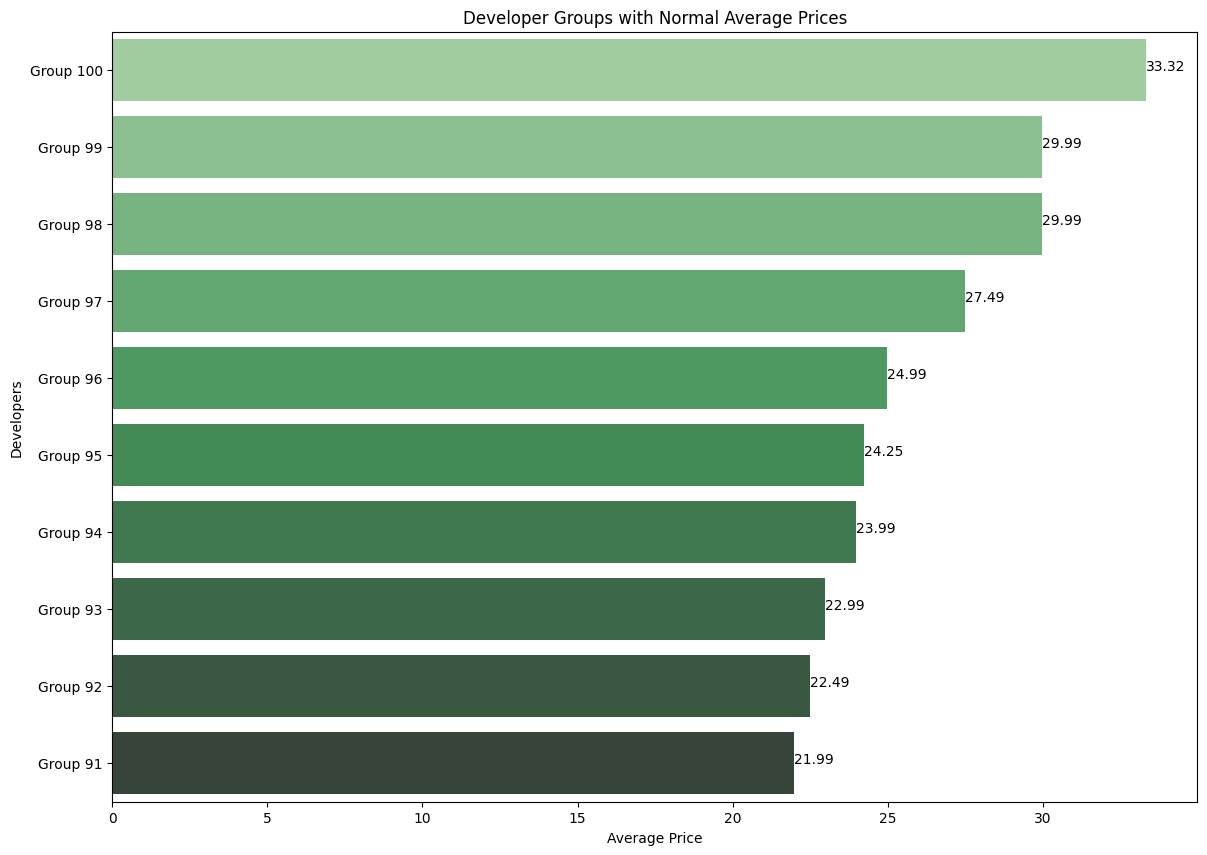

In [144]:
# Plot the groups with normal average prices
plt.figure(figsize=(14, 10))
ax2 = sns.barplot(y='Developers', x='Average Price', data=normal_avg_price, palette='Greens_d')
plt.title('Developer Groups with Normal Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(normal_avg_price['Average Price']):
    ax2.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

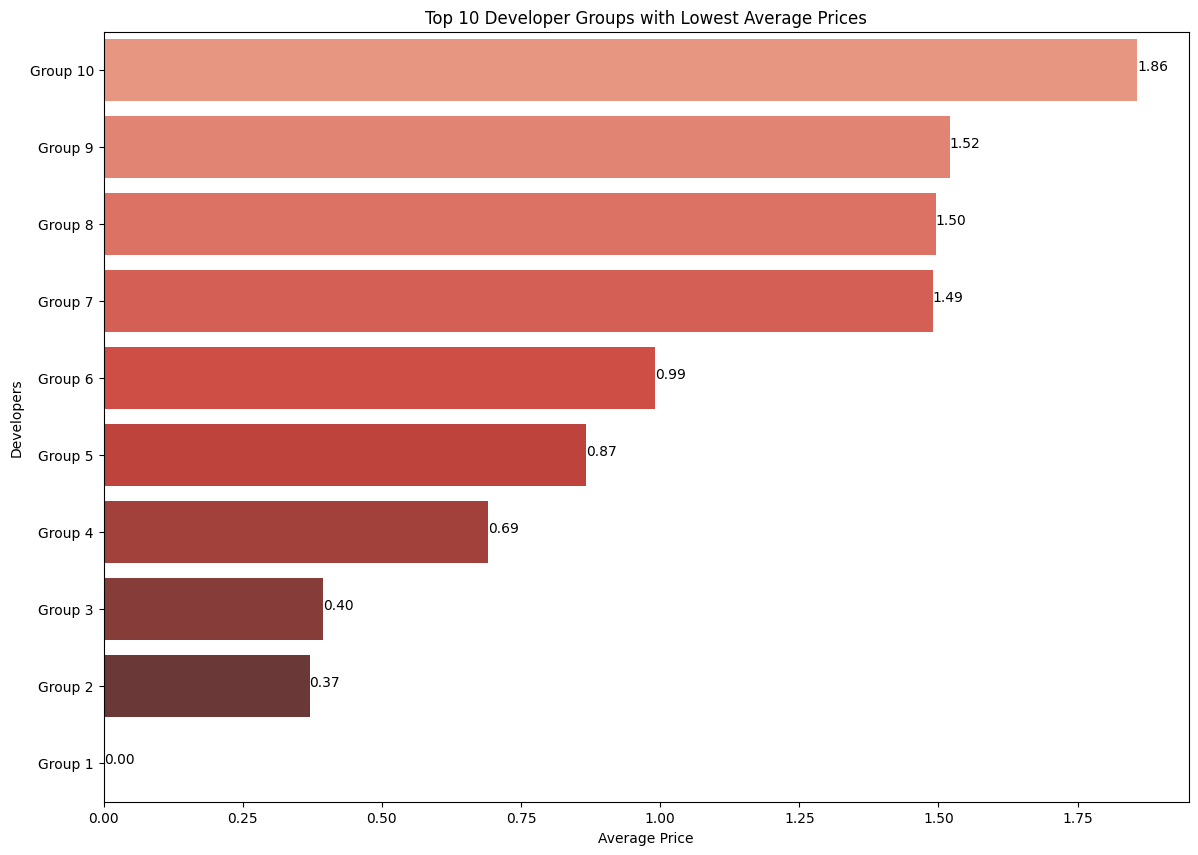

In [145]:
# Plot the top groups with lowest average prices
plt.figure(figsize=(14, 10))
ax3 = sns.barplot(y='Developers', x='Average Price', data=top_10_lowest_avg_price, palette='Reds_d')
plt.title('Top 10 Developer Groups with Lowest Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Developers')

# Annotate the bars with the average price values
for index, value in enumerate(top_10_lowest_avg_price['Average Price']):
    ax3.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()

In [146]:
# Print the dictionary with concatenated names
# for group, names in developer_groups.items():
#     print(f'{group}: {names}')

### Relationship between TOTAL_REVIEW and PRICE

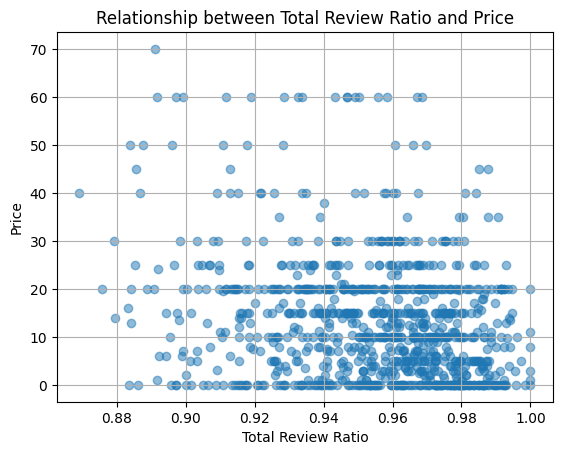

In [180]:
# Plot the relationship between TOTAL_REVIEW and PRICE
plt.scatter(df['TOTAL_REVIEW'], df['PRICE'], alpha=0.5)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.grid(True)
plt.show()


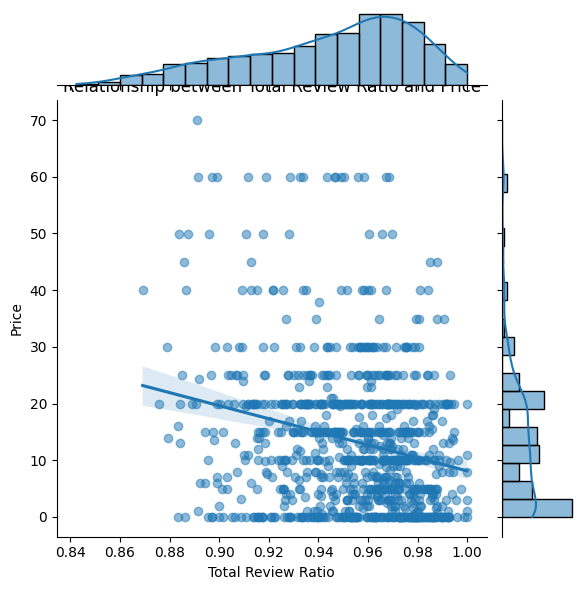

In [181]:
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='reg', scatter_kws={'alpha':0.5})
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


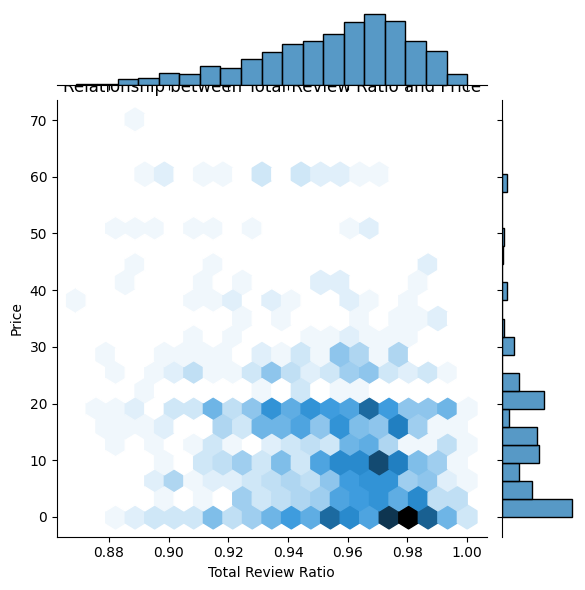

In [182]:
# Create a hexbin plot
sb.jointplot(x='TOTAL_REVIEW', y='PRICE', data=df, kind='hex', gridsize=20)
plt.xlabel('Total Review Ratio')
plt.ylabel('Price')
plt.title('Relationship between Total Review Ratio and Price')
plt.show()


In [183]:
df.nlargest(20, "TOTAL_REVIEW")["NAME"]

347                  monkey business
1970                     ego's spark
1973                          chairs
342               ghost girl lasling
395           liminal border part ii
268              风与鸟 - wind and bird
1093                 genome guardian
424                     harvest hunt
529            bang average football
528                  william and sly
733                   stunt paradise
333                 owinka shooter 2
26                         two cubes
106                       彼方的她-aliya
255        geneforge 2 - infestation
1932                    祈風 inorikaze
328     cats and seek : at dino park
1354                 the werecleaner
561             don't escape trilogy
1361                 aokana - extra2
Name: NAME, dtype: object

In [184]:
df['TOTAL_REVIEW'].nlargest(n=25)

347     1.000000
1970    1.000000
1973    1.000000
342     1.000000
395     1.000000
268     1.000000
1093    1.000000
424     1.000000
529     1.000000
528     1.000000
733     1.000000
333     1.000000
26      1.000000
106     1.000000
255     1.000000
1932    1.000000
328     1.000000
1354    0.998583
561     0.997389
1361    0.997205
870     0.996124
1145    0.995931
1898    0.995495
1289    0.994652
1490    0.994638
Name: TOTAL_REVIEW, dtype: float64

In [185]:
df.query("TOTAL_REVIEW >= 0.99").sort_values(by="TOTAL_REVIEW", ascending=False)[["NAME", "DEVELOPERS", "STORE_GENRE", "TOTAL_REVIEW"]]

NAME               DEVELOPERS  \
1093                            genome guardian                Alpherior   
333                            owinka shooter 2                   Owinka   
268                         风与鸟 - wind and bird                   许愿铃工作室   
424                                harvest hunt  Villainous Games Studio   
395                      liminal border part ii          Purple Software   
529                       bang average football                ruairi dx   
328                cats and seek : at dino park                Noobzilla   
528                             william and sly              Lucas Paakh   
733                              stunt paradise               Brinemedia   
26                                    two cubes                    Rombo   
342                          ghost girl lasling    沉思者貓(The Thinker Cat)   
1973                                     chairs             The Rat Zone   
106                                  彼方的她-aliya                   TDGame   
255                   geneforge 2 - infestation       Spiderweb Software   
1970                                ego's spark                  Satsuki   
1932                               祈風 inorikaze          Twilight -日月之境-   
347                             monkey business               Owen Black   
1354                            the werecleaner             Howlin' Hugs   
561                        don't escape trilogy             scriptwelder   
1361                            aokana - extra2                   sprite   
870                                larcin lazer               Tambouille   
1145                  cats hidden in jingle jam           Travellin Cats   
1898                    her tears were my light               NomnomNami   
1289                     i wani hug that gator!                Cavemanon   
1490                flowers -le volume sur ete-            Innocent Grey   
1795                     yellow taxi goes vroom             Panik Arcade   
1387                 dialtown: phone dating sim              DirectDoggo   
1236                      a castle full of cats                  Devcats   
1858                                 penko park              Ghostbutter   
1525                     black box lss - 闪耀的永生者                      Fif   
1533                   south scrimshaw part one          Nathan O. Marsh   
1119                               kitten burst             Lithodelphis   
1951                              moss: book ii                  Polyarc   
1505                   super lesbian animal rpg                   ponett   
182                         the monster breeder        Fantasy Creations   
868                                      snacko        Bluecurse Studios   
68                          the indigo parallel            Chris Danelon   
1789                 买个可乐饼吧！ - buy a croquette!                       越青   
721      dfhack - dwarf fortress modding engine          The DFHack Team   
1140                               a short hike                 adamgryu   
1838                                  i frog-ot             Krabby Games   
299                         why do you love me?                  Alkinoy   
1197          project kat - paper lily prologue                Leef 6010   
569             deathbulge: battle of the bands               Deathbulge   
1162                                       toem        Something We Made   
1243                          patrick's parabox          Patrick Traynor   
1514                       homicipher: prologue           八名木（yatsunagi）   
315   irotoridori no sekai - the colorful world                 FAVORITE   
1425                           smushi come home          SomeHumbleOnion   
1388                               the upturned                 Zeekerss   
598                         the great rebellion                Kvltgames   
1386                               crow country                SFB Games   
1237           